In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

tf.random.set_seed(42)
np.random.seed(42)

from google.colab import drive
drive.mount('/content/drive')


col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


file_path = '/content/drive/My Drive/an-ninh-mang/dataset/NSL-KDD/NSL-KDD-Network-Intrusion-Detection/NSL_KDD_Train.csv'
df_train = pd.read_csv(file_path, names=col_names )

file_path = '/content/drive/My Drive/an-ninh-mang/dataset/NSL-KDD/NSL-KDD-Network-Intrusion-Detection/NSL_KDD_Test.csv'
df_test = pd.read_csv(file_path, names=col_names)


df_train['Data_Type'] = 1
df_test['Data_Type'] = 0

df = pd.concat([df_train, df_test], ignore_index=True)

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,Data_Type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,0
148513,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,0
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,0
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,0


In [24]:

unique_labels = df['label'].unique()
unique_labels

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [25]:
# df['label'] = df['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
#                            'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
#                            ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
#                            'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

In [26]:
df['label'] = df['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})

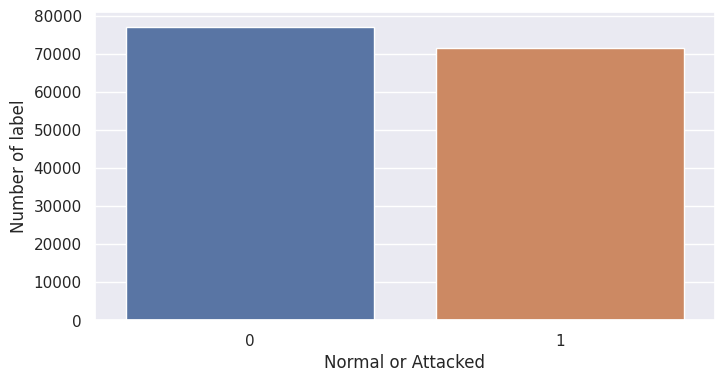

In [27]:
sns.set(rc={'figure.figsize':(8, 4)})
plt.xlabel('Status')
sns.set_theme()
ax = sns.countplot(x='label', data=df)
ax.set(xlabel='Normal or Attacked', ylabel='Number of label')
plt.show()

In [28]:
df = df.drop_duplicates()
df.shape

(148505, 43)

# **Encoding the categorical data - OneHot Encoding**



In [29]:
data_cat = df.select_dtypes(exclude=[np.number])
data_cat.describe(include='all')

,protocol_type,service,flag
count,148505,148505,148505
unique,3,70,11
top,tcp,http,SF
freq,121566,48191,89811


In [30]:
columns_to_encode = data_cat.columns
last_two_columns = df.iloc[:, -2:]
df = df.iloc[:, :-2]

one_hot_encoded = pd.get_dummies(df, columns=columns_to_encode)
df = pd.concat([one_hot_encoded, last_two_columns], axis=1)

df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label,Data_Type
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
148513,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
148514,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,1,0,1,0
148515,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# **Fillna**

In [31]:
df.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:


df2 = df.copy()

In [33]:
df2.fillna(df2.mean(), inplace=True)
print(df2.isna().sum().to_numpy())

df2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label,Data_Type
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
148513,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
148514,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,1,0,1,0
148515,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# **Test**


In [34]:
std_deviation = df2.iloc[:, :-2].std(ddof=0)

rank_dict = {}

for column, std in std_deviation.items():
    rank_dict[column] = std

rank_dict = dict(sorted(rank_dict.items(), key=lambda item: item[1], reverse=True))

for feature, rank in rank_dict.items():
    print(f"{feature}: {rank} RANK {list(rank_dict.keys()).index(feature) + 1}")

src_bytes: 5409811.9381566355 RANK 1
dst_bytes: 3703661.9376625926 RANK 2
duration: 2460.773004583199 RANK 3
count: 116.74880343314899 RANK 4
dst_host_srv_count: 111.23140320117504 RANK 5
dst_host_count: 98.52127850062267 RANK 6
srv_count: 75.37206643427264 RANK 7
num_root: 22.689863376782952 RANK 8
num_compromised: 22.232198095206368 RANK 9
hot: 2.0132337096014377 RANK 10
num_file_creations: 0.517882316387609 RANK 11
logged_in: 0.49046542198502097 RANK 12
flag_SF: 0.4889005701978701 RANK 13
service_http: 0.46819057535647685 RANK 14
dst_host_same_srv_rate: 0.4480566627890855 RANK 15
same_srv_rate: 0.43654194300518095 RANK 16
srv_serror_rate: 0.432588196741357 RANK 17
flag_S0: 0.4319883268958992 RANK 18
serror_rate: 0.43192810317828495 RANK 19
dst_host_srv_serror_rate: 0.42972935043231003 RANK 20
dst_host_serror_rate: 0.42850975462049756 RANK 21
protocol_type_tcp: 0.38535031869181424 RANK 22
service_private: 0.38360362494228045 RANK 23
srv_rerror_rate: 0.34177192756249314 RANK 24
rerror

# **Feature scaling - Standard Scaler**

In [35]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = df2.columns[:-2]
sta = StandardScaler()
df2[columns_to_scale] = sta.fit_transform(df2[columns_to_scale])

df2

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label,Data_Type
0,-0.112486,-0.007346,-0.004614,-0.014681,-0.085491,-0.010404,-0.094075,-0.059834,-0.821304,-0.011474,...,-0.0266,-0.145772,-0.574631,-0.051049,-0.030937,-0.044841,0.808411,-0.048185,0,1
1,-0.112486,-0.007410,-0.004614,-0.014681,-0.085491,-0.010404,-0.094075,-0.059834,-0.821304,-0.011474,...,-0.0266,-0.145772,-0.574631,-0.051049,-0.030937,-0.044841,0.808411,-0.048185,0,1
2,-0.112486,-0.007437,-0.004614,-0.014681,-0.085491,-0.010404,-0.094075,-0.059834,-0.821304,-0.011474,...,-0.0266,-0.145772,1.740246,-0.051049,-0.030937,-0.044841,-1.236995,-0.048185,1,1
3,-0.112486,-0.007394,-0.002413,-0.014681,-0.085491,-0.010404,-0.094075,-0.059834,1.217575,-0.011474,...,-0.0266,-0.145772,-0.574631,-0.051049,-0.030937,-0.044841,0.808411,-0.048185,0,1
4,-0.112486,-0.007400,-0.004501,-0.014681,-0.085491,-0.010404,-0.094075,-0.059834,1.217575,-0.011474,...,-0.0266,-0.145772,-0.574631,-0.051049,-0.030937,-0.044841,0.808411,-0.048185,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,-0.112486,-0.007290,-0.004525,-0.014681,-0.085491,-0.010404,-0.094075,-0.059834,1.217575,-0.011474,...,-0.0266,-0.145772,-0.574631,-0.051049,-0.030937,-0.044841,0.808411,-0.048185,0,0
148513,-0.112486,-0.007378,-0.004361,-0.014681,-0.085491,-0.010404,-0.094075,-0.059834,1.217575,-0.011474,...,-0.0266,-0.145772,-0.574631,-0.051049,-0.030937,-0.044841,0.808411,-0.048185,0,0
148514,-0.112486,0.002645,-0.002370,-0.014681,-0.085491,-0.010404,0.899352,-0.059834,1.217575,0.033506,...,-0.0266,-0.145772,-0.574631,-0.051049,-0.030937,-0.044841,0.808411,-0.048185,1,0
148515,-0.112486,-0.007429,-0.004603,-0.014681,-0.085491,-0.010404,-0.094075,-0.059834,-0.821304,-0.011474,...,-0.0266,-0.145772,-0.574631,-0.051049,-0.030937,-0.044841,0.808411,-0.048185,0,0


In [36]:
print(df['label'].value_counts())

0    77054
1    71451
Name: label, dtype: int64


# **Rank**

In [37]:
mean_dict = df2.iloc[:, :-2].mean(axis=0,numeric_only=True,skipna=True)
median_dict = df2.iloc[:, :-2].median()

difference_dict = {col: abs(mean_dict[col] - median_dict[col]) for col in df2.columns if col != 'label' and col != 'Data_Type'}

difference_dict = dict(sorted(difference_dict.items(), key=lambda item: item[1], reverse=True))

for feature, difference in difference_dict.items():
    print(f"{feature}: Mean = {mean_dict[feature]}, Median = {median_dict[feature]}, Difference = {difference} RANK: {list(difference_dict.keys()).index(feature) + 1}")

logged_in: Mean = 6.554954701803558e-17, Median = -0.8213044911357806, Difference = 0.8213044911357807 RANK: 1
flag_SF: Mean = -6.3157227783800695e-18, Median = 0.8084107645748816, Difference = 0.8084107645748816 RANK: 2
same_srv_rate: Mean = 2.2966264648654798e-17, Median = 0.7491228272588797, Difference = 0.7491228272588797 RANK: 3
dst_host_count: Mean = 4.172204744505622e-17, Median = 0.7212895462981581, Difference = 0.7212895462981581 RANK: 4
service_http: Mean = 3.4449396972982197e-18, Median = -0.6931100483812188, Difference = 0.6931100483812188 RANK: 5
count: Mean = 2.2631339955861916e-17, Median = -0.6024325124169673, Difference = 0.6024325124169673 RANK: 6
dst_host_serror_rate: Mean = -1.3779758789192879e-17, Median = -0.5977499367737927, Difference = 0.5977499367737927 RANK: 7
serror_rate: Mean = -7.119542041082987e-17, Median = -0.594877893087177, Difference = 0.5948778930871769 RANK: 8
srv_serror_rate: Mean = 9.18650585946192e-18, Median = -0.5903018143141127, Difference = 

In [38]:
combined_rank_dict = {}

for feature in rank_dict.keys():
    rank_std = list(rank_dict.keys()).index(feature) + 1
    rank_diff = list(difference_dict.keys()).index(feature) + 1

    combined_rank = rank_std + rank_diff

    combined_rank_dict[feature] = combined_rank

combined_rank_dict = dict(sorted(combined_rank_dict.items(), key=lambda item: item[1]))

for feature, combined_rank in combined_rank_dict.items():
    print(f"{feature}: Combined Rank = {combined_rank}")


count: Combined Rank = 10
dst_host_count: Combined Rank = 10
logged_in: Combined Rank = 13
flag_SF: Combined Rank = 15
service_http: Combined Rank = 19
same_srv_rate: Combined Rank = 19
dst_host_srv_count: Combined Rank = 20
srv_serror_rate: Combined Rank = 26
serror_rate: Combined Rank = 27
dst_host_serror_rate: Combined Rank = 28
flag_S0: Combined Rank = 29
dst_host_srv_serror_rate: Combined Rank = 30
srv_count: Combined Rank = 32
protocol_type_tcp: Combined Rank = 35
service_private: Combined Rank = 37
dst_host_same_src_port_rate: Combined Rank = 41
duration: Combined Rank = 43
srv_rerror_rate: Combined Rank = 43
rerror_rate: Combined Rank = 43
dst_host_srv_rerror_rate: Combined Rank = 43
dst_host_rerror_rate: Combined Rank = 44
protocol_type_udp: Combined Rank = 48
dst_host_same_srv_rate: Combined Rank = 50
srv_diff_host_rate: Combined Rank = 51
hot: Combined Rank = 52
flag_REJ: Combined Rank = 53
service_domain_u: Combined Rank = 59
diff_srv_rate: Combined Rank = 59
protocol_type_

# **Splitting the dataset**

In [39]:
train_data = df2[df2['Data_Type'] == 1]
test_data = df2[df2['Data_Type'] == 0]

train_data = train_data.drop('Data_Type', axis=1)
test_data = test_data.drop('Data_Type', axis=1)

In [40]:
test_data.shape

(22541, 123)

In [41]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']


# Training

In [42]:
combined_rank_dict = dict(sorted(combined_rank_dict.items(), key=lambda item: item[1]))
top_features = list(combined_rank_dict.keys())[:]

print(len(top_features))
print(top_features)

122
['count', 'dst_host_count', 'logged_in', 'flag_SF', 'service_http', 'same_srv_rate', 'dst_host_srv_count', 'srv_serror_rate', 'serror_rate', 'dst_host_serror_rate', 'flag_S0', 'dst_host_srv_serror_rate', 'srv_count', 'protocol_type_tcp', 'service_private', 'dst_host_same_src_port_rate', 'duration', 'srv_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_rerror_rate', 'protocol_type_udp', 'dst_host_same_srv_rate', 'srv_diff_host_rate', 'hot', 'flag_REJ', 'service_domain_u', 'diff_srv_rate', 'protocol_type_icmp', 'dst_host_diff_srv_rate', 'service_smtp', 'service_ftp_data', 'service_other', 'service_eco_i', 'service_telnet', 'dst_host_srv_diff_host_rate', 'service_ecr_i', 'wrong_fragment', 'flag_RSTR', 'service_ftp', 'flag_RSTO', 'service_finger', 'is_guest_login', 'service_pop_3', 'service_auth', 'service_imap4', 'service_Z39_50', 'service_uucp', 'service_courier', 'service_bgp', 'service_iso_tsap', 'service_uucp_path', 'num_file_creations', 'service_whois', 'src_byt

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def evaluate_classification_with_plot(truth, predicted, threshold=0.5, class_names=['Bengin', 'Malicious']):
    predicted_binary = (predicted > threshold).astype(int)

    confusion = confusion_matrix(truth, predicted_binary)


    accuracy = accuracy_score(truth, predicted_binary)
    print("Accuracy:", accuracy)

    precision, recall, f1, _ = precision_recall_fscore_support(truth, predicted_binary, average='binary')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

    plot_confusion_matrix(confusion, class_names)

    return accuracy




Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.5149 - accuracy: 0.8033 - val_loss: 0.7107 - val_accuracy: 0.6582
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.4855 - accuracy: 0.8202 - val_loss: 0.7177 - val_accuracy: 0.6604
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.4803 - accuracy: 0.8213 - val_loss: 0.7168 - val_accuracy: 0.6604
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.4779 - accuracy: 0.8213 - val_loss: 0.7138 - val_accuracy: 0.6604
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.4751 - accuracy: 0.8216 - val_loss: 0.7084 - val_accuracy: 0.6616
Epoch 6/10
493/493 [==============================] - 1s 2ms/step - loss: 0.4743 - accuracy: 0.8213 - val_loss: 0.7102 - val_accuracy: 0.6612
Epoch 7/10
493/493 [==============================] - 1s 2ms/step - loss: 0.4723 - accuracy: 0.8211 - val_loss: 0.7104 - val_accuracy: 0.6612
Epoch 

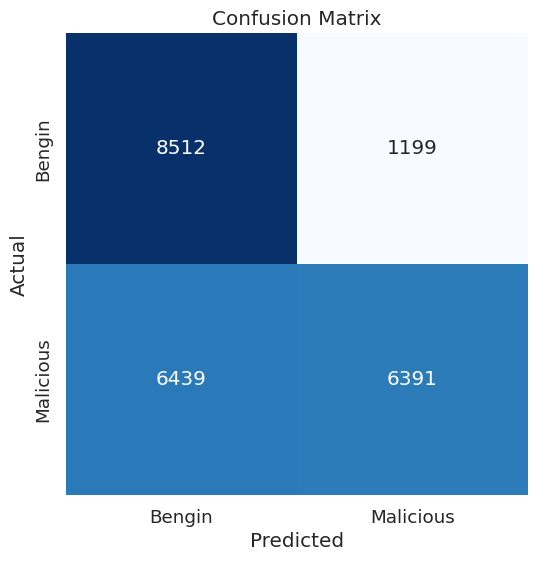

Current feature: count
1 features => accuracy: 0.6611507918903332
Previous accuracy: 0.6611507918903332
train dataset shape: (125964, 1)
Max accuracy: 0.6611507918903332
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.5165 - accuracy: 0.7934 - val_loss: 0.7070 - val_accuracy: 0.6585
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.4824 - accuracy: 0.8179 - val_loss: 0.7110 - val_accuracy: 0.6619
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.4748 - accuracy: 0.8200 - val_loss: 0.7098 - val_accuracy: 0.6627
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.4694 - accuracy: 0.8204 - val_loss: 0.7127 - val_accuracy: 0.6625
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.4659 - accuracy: 0.8213 - val_loss: 0.6949 - val_accuracy: 0.6630
Epoch 6/10
493/493 

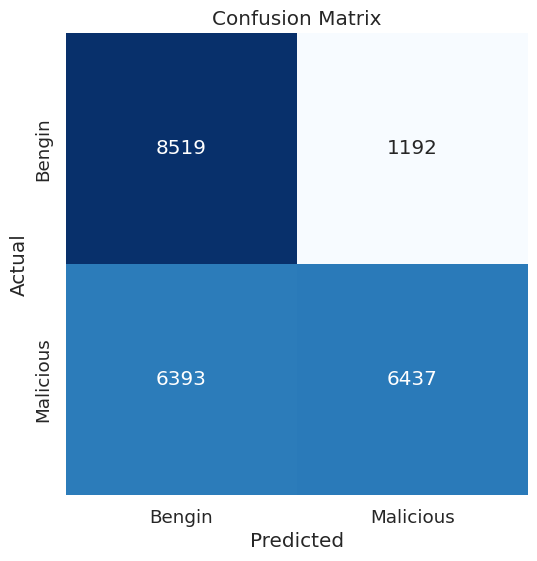

Current feature: dst_host_count
2 features => accuracy: 0.6635020629075906
Previous accuracy: 0.6635020629075906
train dataset shape: (125964, 2)
Max accuracy: 0.6635020629075906
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.4465 - accuracy: 0.7985 - val_loss: 0.7292 - val_accuracy: 0.7681
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.3982 - accuracy: 0.8357 - val_loss: 0.7557 - val_accuracy: 0.6997
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.3924 - accuracy: 0.8403 - val_loss: 0.7530 - val_accuracy: 0.6931
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.3868 - accuracy: 0.8445 - val_loss: 0.7631 - val_accuracy: 0.6951
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.3825 - accuracy: 0.8468 - val_loss: 0.7431 - val_accuracy: 0.7038
Epoch 6/10

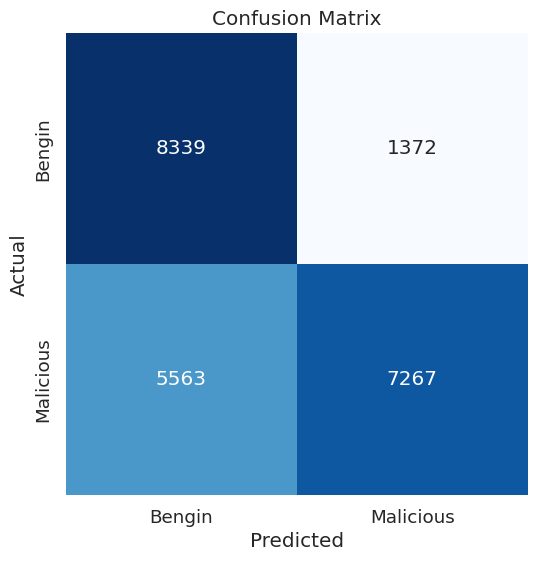

Current feature: logged_in
3 features => accuracy: 0.6923384055720687
Previous accuracy: 0.6923384055720687
train dataset shape: (125964, 3)
Max accuracy: 0.6923384055720687
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.3416 - accuracy: 0.8584 - val_loss: 0.6461 - val_accuracy: 0.7525
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2479 - accuracy: 0.9133 - val_loss: 0.6581 - val_accuracy: 0.7442
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2350 - accuracy: 0.9198 - val_loss: 0.6864 - val_accuracy: 0.7403
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2285 - accuracy: 0.9227 - val_loss: 0.6746 - val_accuracy: 0.7393
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2208 - accuracy: 0.9256 - val_loss: 0.6920 - val_accuracy: 0.7391
Epoch 6/10
493/

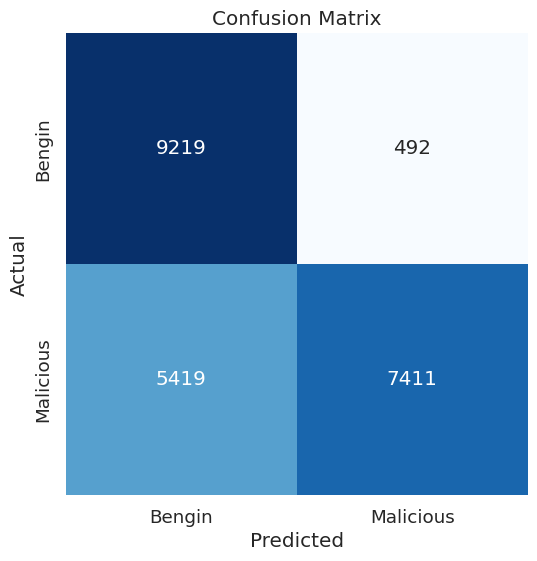

Current feature: flag_SF
4 features => accuracy: 0.7377667361696464
Previous accuracy: 0.7377667361696464
train dataset shape: (125964, 4)
Max accuracy: 0.7377667361696464
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.3220 - accuracy: 0.8653 - val_loss: 0.5574 - val_accuracy: 0.7657
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2241 - accuracy: 0.9240 - val_loss: 0.5782 - val_accuracy: 0.7588
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2116 - accuracy: 0.9297 - val_loss: 0.6010 - val_accuracy: 0.7576
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2057 - accuracy: 0.9321 - val_loss: 0.6193 - val_accuracy: 0.7552
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1997 - accuracy: 0.9340 - val_loss: 0.6232 - val_accuracy: 0.7553
Epoch 6/10
493/49

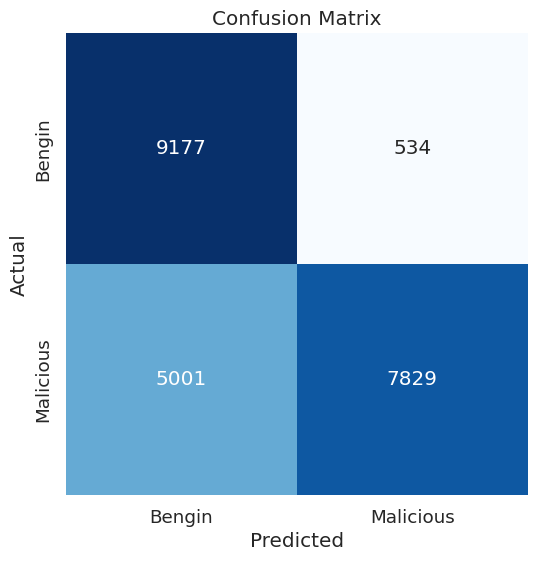

Current feature: service_http
5 features => accuracy: 0.7544474513109445
Previous accuracy: 0.7544474513109445
train dataset shape: (125964, 5)
Max accuracy: 0.7544474513109445
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 1s 2ms/step - loss: 0.3090 - accuracy: 0.8725 - val_loss: 0.5757 - val_accuracy: 0.7650
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2185 - accuracy: 0.9272 - val_loss: 0.5708 - val_accuracy: 0.7695
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2066 - accuracy: 0.9313 - val_loss: 0.5831 - val_accuracy: 0.7673
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2011 - accuracy: 0.9329 - val_loss: 0.5860 - val_accuracy: 0.7666
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1957 - accuracy: 0.9350 - val_loss: 0.5972 - val_accuracy: 0.7651
Epoch 6/10
4

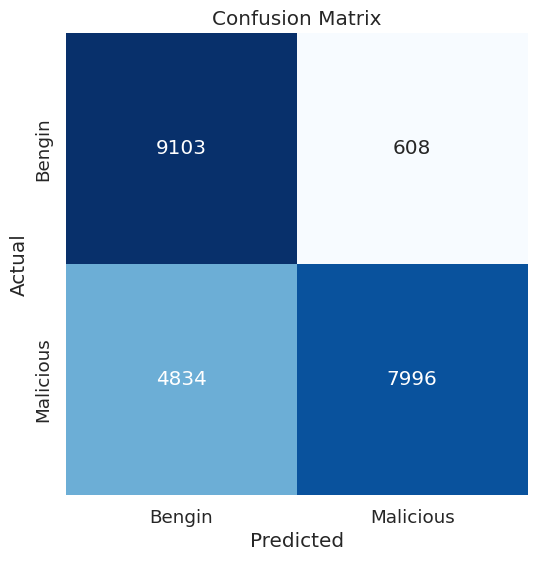

Current feature: same_srv_rate
6 features => accuracy: 0.7585732664921698
Previous accuracy: 0.7585732664921698
train dataset shape: (125964, 6)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 1s 2ms/step - loss: 0.3057 - accuracy: 0.8688 - val_loss: 0.6858 - val_accuracy: 0.7551
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2066 - accuracy: 0.9227 - val_loss: 0.7461 - val_accuracy: 0.7539
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1897 - accuracy: 0.9306 - val_loss: 0.7467 - val_accuracy: 0.7528
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1810 - accuracy: 0.9335 - val_loss: 0.7651 - val_accuracy: 0.7526
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1759 - accuracy: 0.9365 - val_loss: 0.7588 - val_accuracy: 0.7507
Epoch 6/10


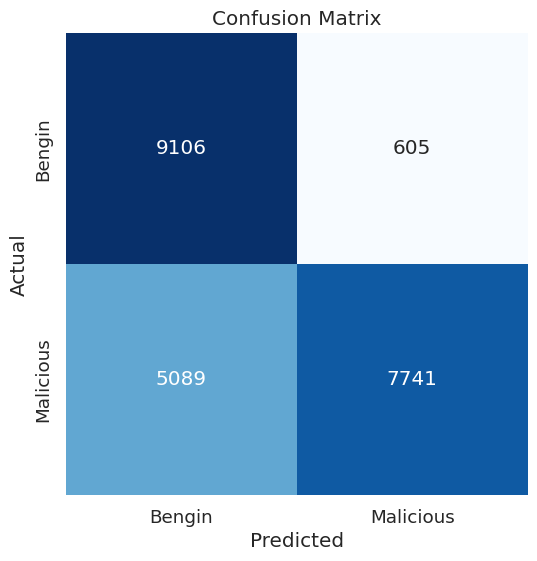

Current feature: dst_host_srv_count
7 features => accuracy: 0.7473936382591722
Previous accuracy: 0.7473936382591722
train dataset shape: (125964, 7)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2959 - accuracy: 0.8730 - val_loss: 0.7070 - val_accuracy: 0.7618
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2024 - accuracy: 0.9175 - val_loss: 0.7727 - val_accuracy: 0.7571
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1909 - accuracy: 0.9225 - val_loss: 0.7634 - val_accuracy: 0.7548
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1812 - accuracy: 0.9278 - val_loss: 0.7921 - val_accuracy: 0.7563
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1740 - accuracy: 0.9317 - val_loss: 0.8020 - val_accuracy: 0.7559
Epoch 

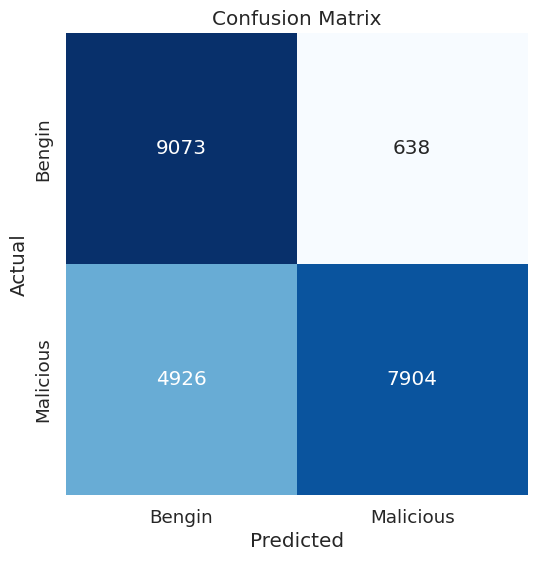

Current feature: srv_serror_rate
8 features => accuracy: 0.7531609067920678
Previous accuracy: 0.7531609067920678
train dataset shape: (125964, 8)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.3018 - accuracy: 0.8657 - val_loss: 0.7618 - val_accuracy: 0.7597
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2021 - accuracy: 0.9252 - val_loss: 0.7977 - val_accuracy: 0.7563
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1874 - accuracy: 0.9318 - val_loss: 0.7752 - val_accuracy: 0.7541
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1779 - accuracy: 0.9351 - val_loss: 0.7953 - val_accuracy: 0.7534
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1712 - accuracy: 0.9374 - val_loss: 0.8016 - val_accuracy: 0.7545
Epoch 6/1

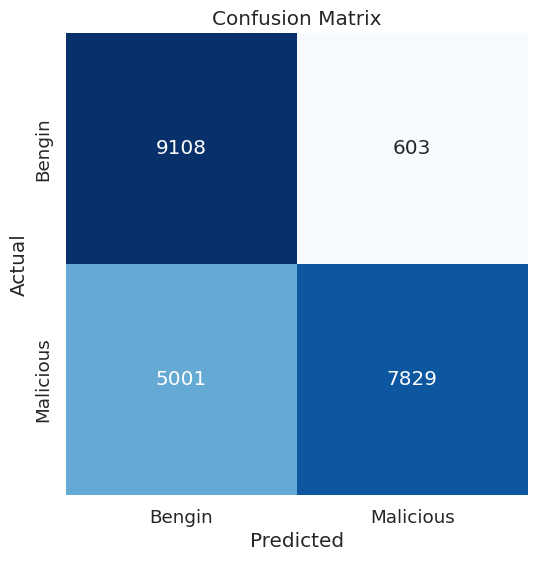

Current feature: serror_rate
9 features => accuracy: 0.7513863626280999
Previous accuracy: 0.7513863626280999
train dataset shape: (125964, 9)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2966 - accuracy: 0.8733 - val_loss: 0.6632 - val_accuracy: 0.7615
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2027 - accuracy: 0.9256 - val_loss: 0.7302 - val_accuracy: 0.7583
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1869 - accuracy: 0.9301 - val_loss: 0.7306 - val_accuracy: 0.7556
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1781 - accuracy: 0.9327 - val_loss: 0.7828 - val_accuracy: 0.7529
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1730 - accuracy: 0.9330 - val_loss: 0.7872 - val_accuracy: 0.7534
Epoch 6/10
49

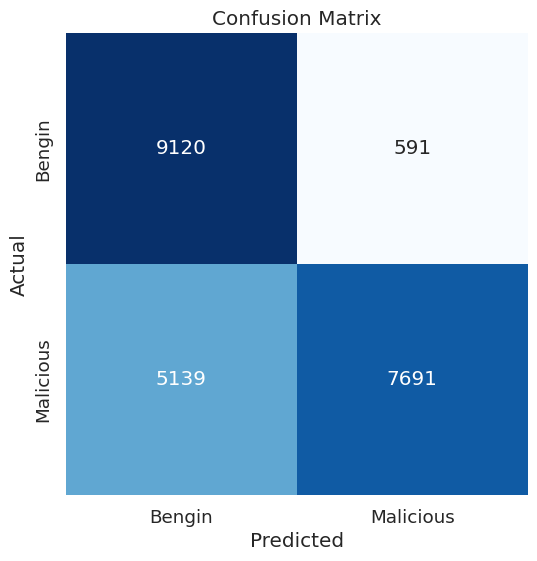

Current feature: dst_host_serror_rate
10 features => accuracy: 0.745796548511601
Previous accuracy: 0.745796548511601
train dataset shape: (125964, 10)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.3043 - accuracy: 0.8617 - val_loss: 0.7292 - val_accuracy: 0.7546
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2038 - accuracy: 0.9219 - val_loss: 0.7839 - val_accuracy: 0.7527
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1891 - accuracy: 0.9289 - val_loss: 0.8046 - val_accuracy: 0.7475
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1823 - accuracy: 0.9305 - val_loss: 0.8310 - val_accuracy: 0.7458
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1757 - accuracy: 0.9326 - val_loss: 0.8351 - val_accuracy: 0.7494
Epoc

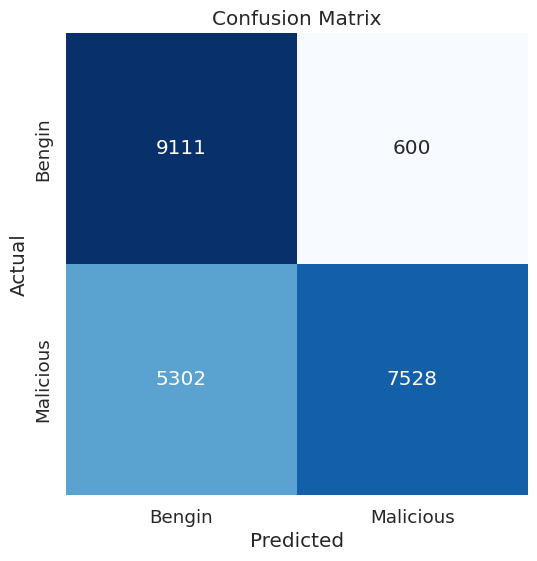

Current feature: flag_S0
11 features => accuracy: 0.7381660086065392
Previous accuracy: 0.7381660086065392
train dataset shape: (125964, 11)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2848 - accuracy: 0.8817 - val_loss: 0.7226 - val_accuracy: 0.7564
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1952 - accuracy: 0.9270 - val_loss: 0.7798 - val_accuracy: 0.7492
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1821 - accuracy: 0.9324 - val_loss: 0.8032 - val_accuracy: 0.7434
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1734 - accuracy: 0.9357 - val_loss: 0.8434 - val_accuracy: 0.7424
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1655 - accuracy: 0.9394 - val_loss: 0.8446 - val_accuracy: 0.7419
Epoch 6/10
493/

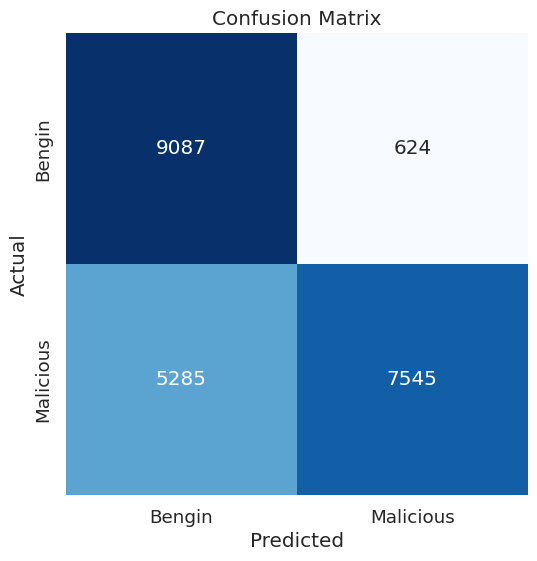

Current feature: dst_host_srv_serror_rate
12 features => accuracy: 0.7378554633778448
Previous accuracy: 0.7378554633778448
train dataset shape: (125964, 12)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8498 - val_loss: 0.6500 - val_accuracy: 0.7607
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2319 - accuracy: 0.9202 - val_loss: 0.7468 - val_accuracy: 0.7548
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2126 - accuracy: 0.9297 - val_loss: 0.7758 - val_accuracy: 0.7536
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1981 - accuracy: 0.9352 - val_loss: 0.8792 - val_accuracy: 0.7505
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1865 - accuracy: 0.9381 - val_loss: 0.9486 - val_accuracy: 0.748

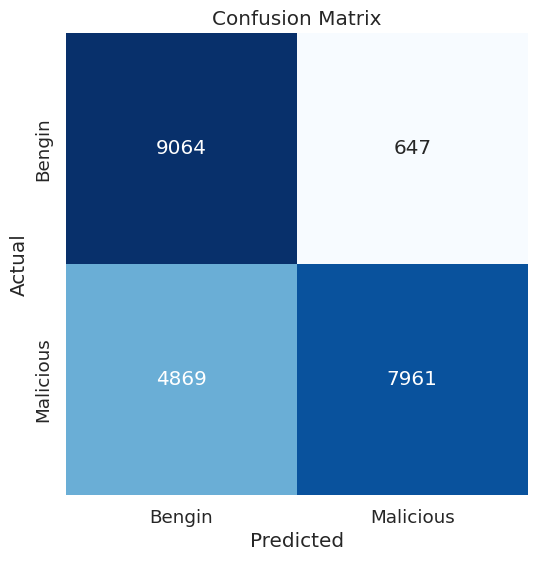

Current feature: srv_count
13 features => accuracy: 0.7552903597888292
Previous accuracy: 0.7552903597888292
train dataset shape: (125964, 13)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2720 - accuracy: 0.8895 - val_loss: 0.7282 - val_accuracy: 0.7376
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1908 - accuracy: 0.9318 - val_loss: 0.8650 - val_accuracy: 0.7285
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1761 - accuracy: 0.9372 - val_loss: 0.8972 - val_accuracy: 0.7221
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1660 - accuracy: 0.9403 - val_loss: 0.9726 - val_accuracy: 0.7214
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1602 - accuracy: 0.9424 - val_loss: 0.9705 - val_accuracy: 0.7210
Epoch 6/10
49

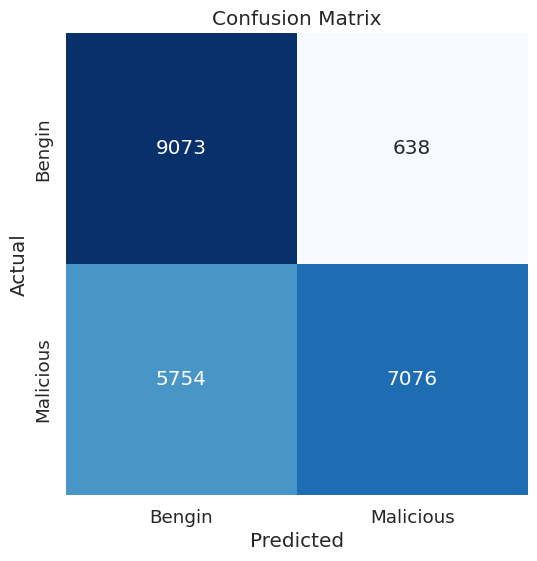

Current feature: protocol_type_tcp
14 features => accuracy: 0.7164278425979327
Previous accuracy: 0.7164278425979327
train dataset shape: (125964, 14)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2752 - accuracy: 0.8870 - val_loss: 0.7794 - val_accuracy: 0.7312
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1724 - accuracy: 0.9439 - val_loss: 0.9493 - val_accuracy: 0.7230
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1550 - accuracy: 0.9493 - val_loss: 1.0362 - val_accuracy: 0.7096
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1443 - accuracy: 0.9523 - val_loss: 1.1358 - val_accuracy: 0.7065
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1374 - accuracy: 0.9541 - val_loss: 1.2221 - val_accuracy: 0.7064
Epoch

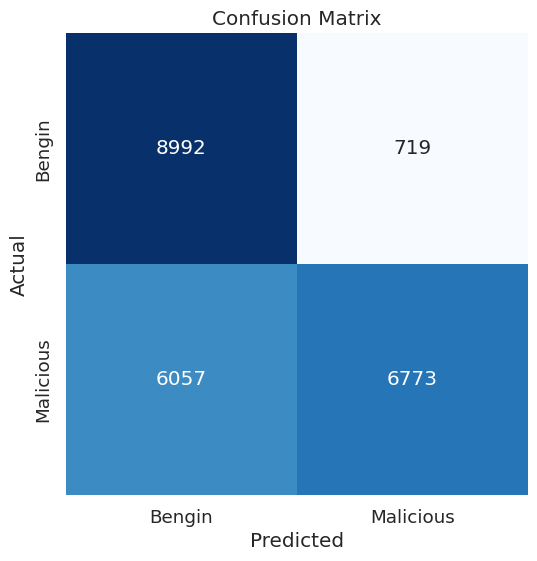

Current feature: service_private
15 features => accuracy: 0.699392218623841
Previous accuracy: 0.699392218623841
train dataset shape: (125964, 15)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2463 - accuracy: 0.9062 - val_loss: 0.8947 - val_accuracy: 0.7321
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1489 - accuracy: 0.9527 - val_loss: 1.0847 - val_accuracy: 0.7234
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1316 - accuracy: 0.9565 - val_loss: 1.1896 - val_accuracy: 0.7186
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1204 - accuracy: 0.9587 - val_loss: 1.3466 - val_accuracy: 0.7094
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9606 - val_loss: 1.4425 - val_accuracy: 0.7143
Epoch 6/1

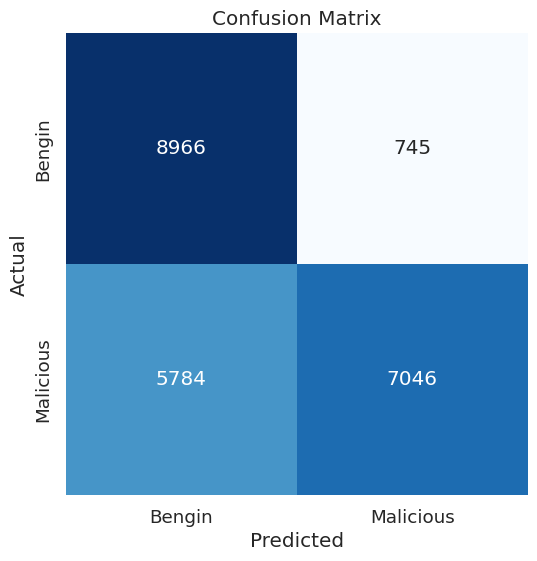

Current feature: dst_host_same_src_port_rate
16 features => accuracy: 0.7103500288363427
Previous accuracy: 0.7103500288363427
train dataset shape: (125964, 16)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2536 - accuracy: 0.9025 - val_loss: 0.8274 - val_accuracy: 0.7400
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1516 - accuracy: 0.9540 - val_loss: 0.9901 - val_accuracy: 0.7373
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1323 - accuracy: 0.9584 - val_loss: 1.1207 - val_accuracy: 0.7268
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1197 - accuracy: 0.9605 - val_loss: 1.2820 - val_accuracy: 0.7170
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1129 - accuracy: 0.9618 - val_loss: 1.3811 - val_accuracy: 0.

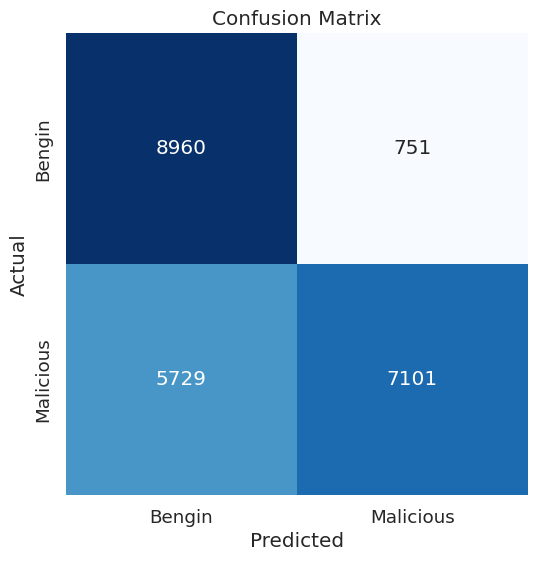

Current feature: duration
17 features => accuracy: 0.7125238454372034
Previous accuracy: 0.7125238454372034
train dataset shape: (125964, 17)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2563 - accuracy: 0.8928 - val_loss: 0.8653 - val_accuracy: 0.7458
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1513 - accuracy: 0.9544 - val_loss: 1.0262 - val_accuracy: 0.7197
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1347 - accuracy: 0.9595 - val_loss: 1.0964 - val_accuracy: 0.7210
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1234 - accuracy: 0.9623 - val_loss: 1.2016 - val_accuracy: 0.7171
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1149 - accuracy: 0.9630 - val_loss: 1.3245 - val_accuracy: 0.7234
Epoch 6/10
493

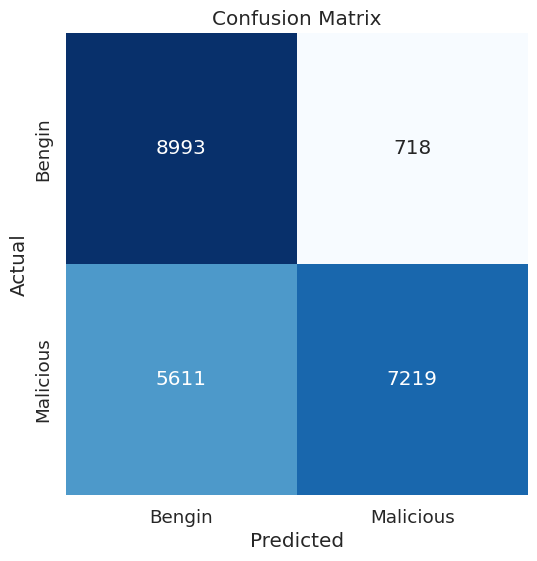

Current feature: srv_rerror_rate
18 features => accuracy: 0.719222749656182
Previous accuracy: 0.719222749656182
train dataset shape: (125964, 18)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2375 - accuracy: 0.9073 - val_loss: 0.8929 - val_accuracy: 0.7351
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1423 - accuracy: 0.9549 - val_loss: 1.1032 - val_accuracy: 0.7230
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1234 - accuracy: 0.9595 - val_loss: 1.2093 - val_accuracy: 0.7203
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1140 - accuracy: 0.9619 - val_loss: 1.3370 - val_accuracy: 0.7246
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1072 - accuracy: 0.9632 - val_loss: 1.4396 - val_accuracy: 0.7254
Epoch 6/1

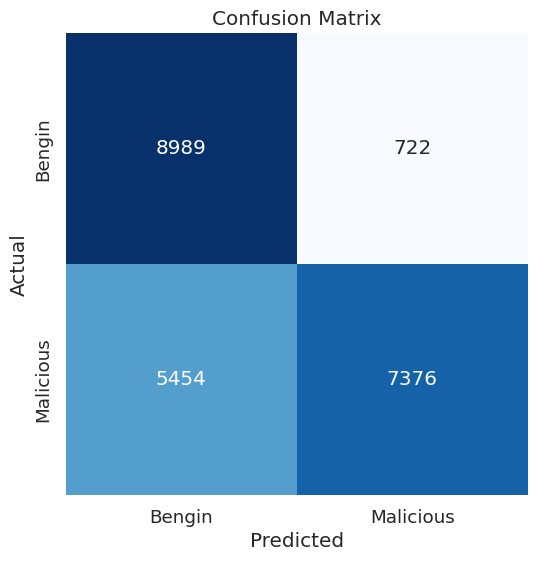

Current feature: rerror_rate
19 features => accuracy: 0.7260103810833592
Previous accuracy: 0.7260103810833592
train dataset shape: (125964, 19)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2664 - accuracy: 0.8875 - val_loss: 0.8793 - val_accuracy: 0.7491
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1478 - accuracy: 0.9468 - val_loss: 1.1130 - val_accuracy: 0.7433
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1280 - accuracy: 0.9539 - val_loss: 1.2338 - val_accuracy: 0.7317
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1172 - accuracy: 0.9584 - val_loss: 1.3756 - val_accuracy: 0.7329
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1092 - accuracy: 0.9598 - val_loss: 1.5224 - val_accuracy: 0.7322
Epoch 6/10


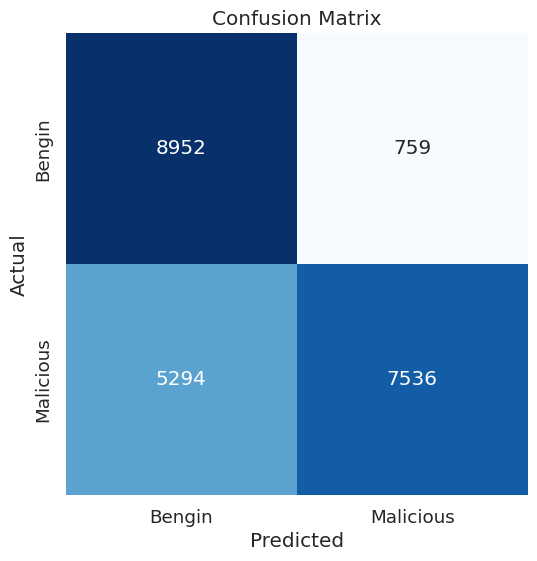

Current feature: dst_host_srv_rerror_rate
20 features => accuracy: 0.7314671043875605
Previous accuracy: 0.7314671043875605
train dataset shape: (125964, 20)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2373 - accuracy: 0.9076 - val_loss: 0.9003 - val_accuracy: 0.7579
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1394 - accuracy: 0.9538 - val_loss: 1.0602 - val_accuracy: 0.7360
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1188 - accuracy: 0.9590 - val_loss: 1.1635 - val_accuracy: 0.7552
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1094 - accuracy: 0.9621 - val_loss: 1.2473 - val_accuracy: 0.7485
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1038 - accuracy: 0.9638 - val_loss: 1.3327 - val_accuracy: 0.746

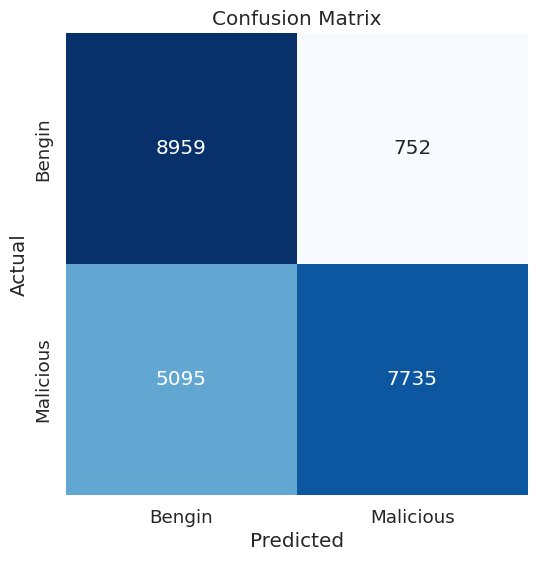

Current feature: dst_host_rerror_rate
21 features => accuracy: 0.7406060068319951
Previous accuracy: 0.7406060068319951
train dataset shape: (125964, 21)
Max accuracy: 0.7585732664921698
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2331 - accuracy: 0.9115 - val_loss: 0.7221 - val_accuracy: 0.7740
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1193 - accuracy: 0.9645 - val_loss: 0.9363 - val_accuracy: 0.7547
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9697 - val_loss: 1.0591 - val_accuracy: 0.7536
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9712 - val_loss: 1.1765 - val_accuracy: 0.7553
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9724 - val_loss: 1.2379 - val_accuracy: 0.7562
Ep

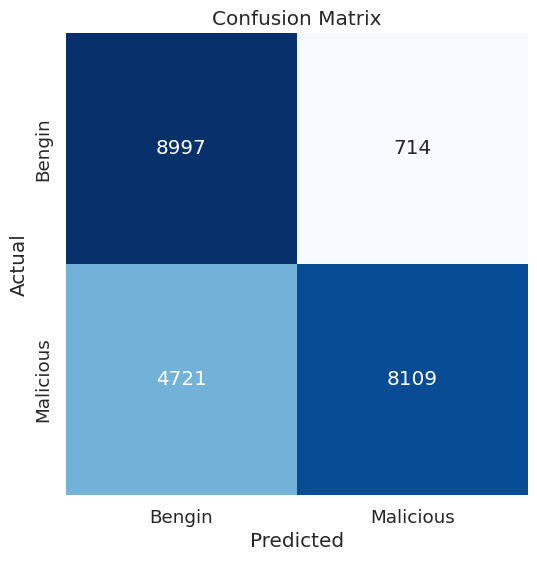

Current feature: protocol_type_udp
22 features => accuracy: 0.7588838117208642
Previous accuracy: 0.7588838117208642
train dataset shape: (125964, 22)
Max accuracy: 0.7588838117208642
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2383 - accuracy: 0.9095 - val_loss: 0.7666 - val_accuracy: 0.7725
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1176 - accuracy: 0.9653 - val_loss: 0.9563 - val_accuracy: 0.7516
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0981 - accuracy: 0.9691 - val_loss: 1.0614 - val_accuracy: 0.7539
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9709 - val_loss: 1.1488 - val_accuracy: 0.7514
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9721 - val_loss: 1.2822 - val_accuracy: 0.7507
Epoch

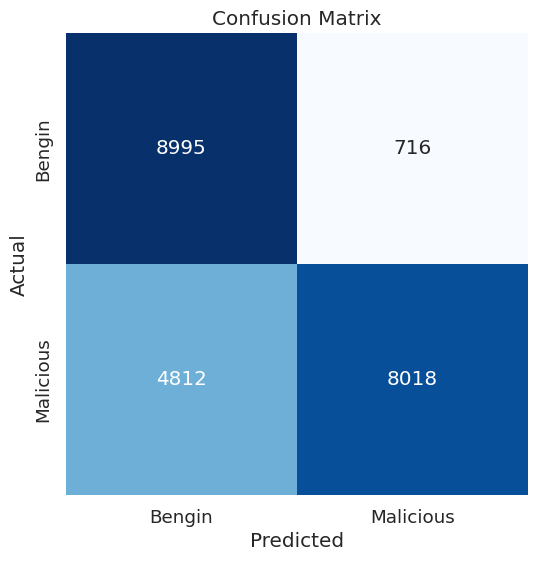

Current feature: dst_host_same_srv_rate
23 features => accuracy: 0.7547579965396389
Previous accuracy: 0.7547579965396389
train dataset shape: (125964, 23)
Max accuracy: 0.7588838117208642
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2489 - accuracy: 0.9027 - val_loss: 0.7725 - val_accuracy: 0.7773
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1249 - accuracy: 0.9656 - val_loss: 0.9469 - val_accuracy: 0.7536
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1024 - accuracy: 0.9707 - val_loss: 1.0439 - val_accuracy: 0.7521
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9735 - val_loss: 1.1764 - val_accuracy: 0.7535
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9749 - val_loss: 1.2513 - val_accuracy: 0.7548


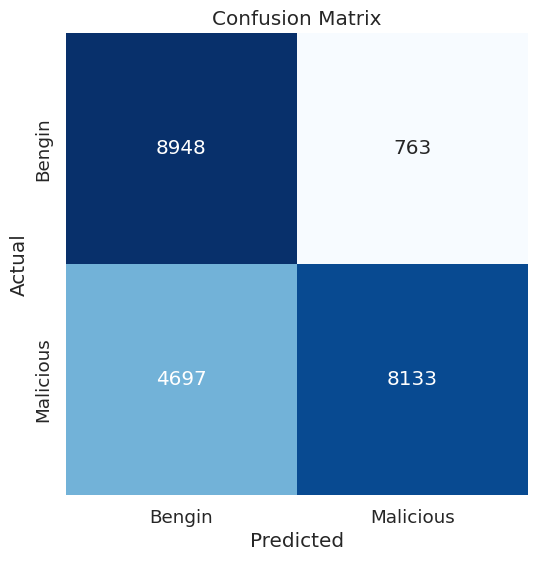

Current feature: srv_diff_host_rate
24 features => accuracy: 0.7577747216183843
Previous accuracy: 0.7577747216183843
train dataset shape: (125964, 24)
Max accuracy: 0.7588838117208642
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2527 - accuracy: 0.8956 - val_loss: 0.8869 - val_accuracy: 0.7446
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1033 - accuracy: 0.9629 - val_loss: 1.1562 - val_accuracy: 0.7390
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9704 - val_loss: 1.4102 - val_accuracy: 0.7427
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0610 - accuracy: 0.9747 - val_loss: 1.6723 - val_accuracy: 0.7415
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0575 - accuracy: 0.9795 - val_loss: 1.7959 - val_accuracy: 0.7525
Epoc

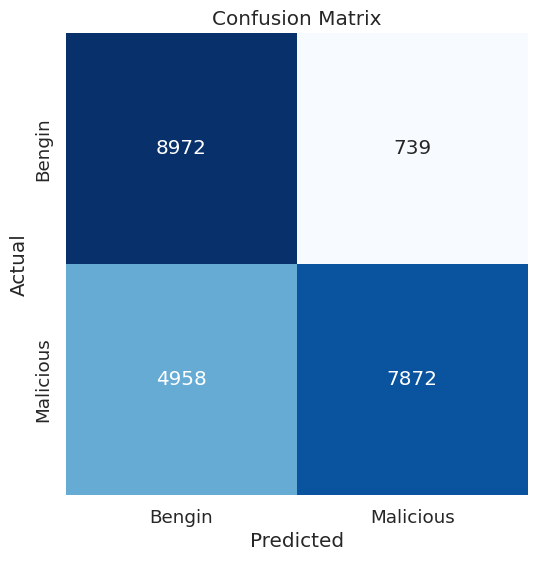

Current feature: hot
25 features => accuracy: 0.7472605474468745
Previous accuracy: 0.7472605474468745
train dataset shape: (125964, 25)
Max accuracy: 0.7588838117208642
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2425 - accuracy: 0.9031 - val_loss: 0.8895 - val_accuracy: 0.7557
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9658 - val_loss: 1.1511 - val_accuracy: 0.7525
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0719 - accuracy: 0.9739 - val_loss: 1.3298 - val_accuracy: 0.7589
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0623 - accuracy: 0.9781 - val_loss: 1.5735 - val_accuracy: 0.7658
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0571 - accuracy: 0.9802 - val_loss: 1.6526 - val_accuracy: 0.7822
Epoch 6/10
493/493 

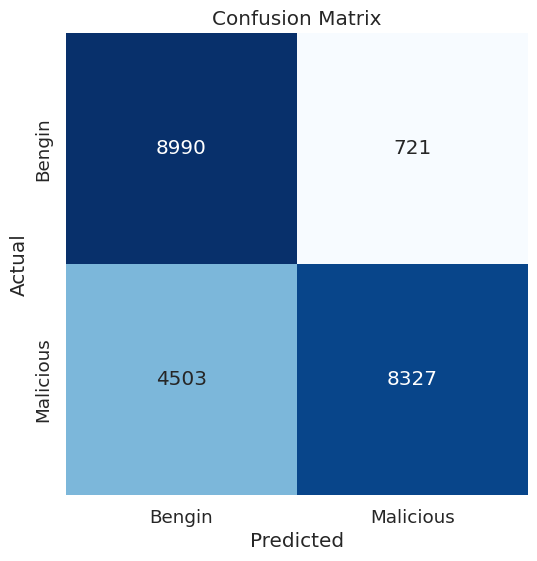

Current feature: flag_REJ
26 features => accuracy: 0.7682445321857948
Previous accuracy: 0.7682445321857948
train dataset shape: (125964, 26)
Max accuracy: 0.7682445321857948
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2874 - accuracy: 0.8810 - val_loss: 0.7206 - val_accuracy: 0.7627
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1259 - accuracy: 0.9650 - val_loss: 0.9614 - val_accuracy: 0.7489
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0893 - accuracy: 0.9709 - val_loss: 1.1629 - val_accuracy: 0.7451
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.9732 - val_loss: 1.3269 - val_accuracy: 0.7477
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0700 - accuracy: 0.9749 - val_loss: 1.4574 - val_accuracy: 0.7476
Epoch 6/10
493

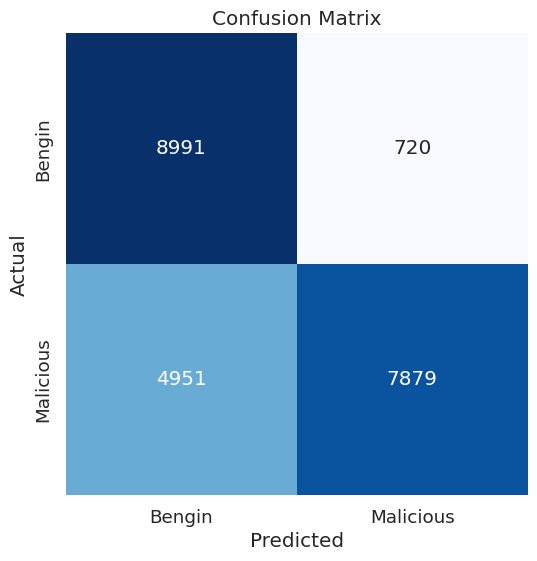

Current feature: service_domain_u
27 features => accuracy: 0.7484140011534537
Previous accuracy: 0.7484140011534537
train dataset shape: (125964, 27)
Max accuracy: 0.7682445321857948
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2737 - accuracy: 0.8879 - val_loss: 0.8462 - val_accuracy: 0.7507
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9647 - val_loss: 1.0350 - val_accuracy: 0.7451
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0848 - accuracy: 0.9728 - val_loss: 1.2098 - val_accuracy: 0.7498
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9771 - val_loss: 1.3937 - val_accuracy: 0.7501
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9799 - val_loss: 1.5625 - val_accuracy: 0.7590
Epoch 

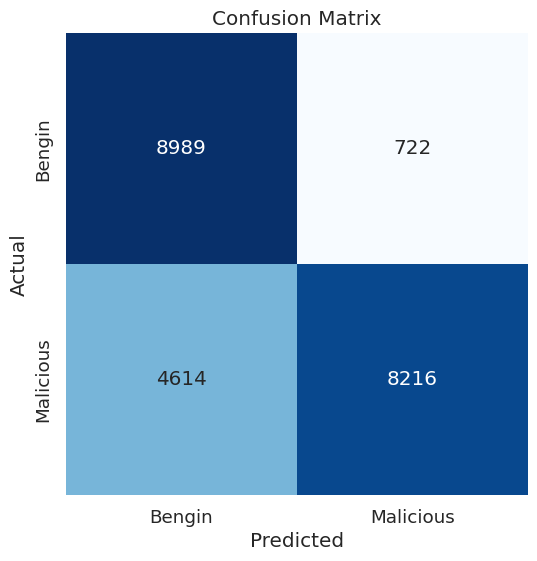

Current feature: diff_srv_rate
28 features => accuracy: 0.7632758085266848
Previous accuracy: 0.7632758085266848
train dataset shape: (125964, 28)
Max accuracy: 0.7682445321857948
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2493 - accuracy: 0.9017 - val_loss: 0.7731 - val_accuracy: 0.7552
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1084 - accuracy: 0.9650 - val_loss: 0.9490 - val_accuracy: 0.7436
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.9704 - val_loss: 1.1082 - val_accuracy: 0.7461
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0646 - accuracy: 0.9754 - val_loss: 1.3159 - val_accuracy: 0.7462
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0572 - accuracy: 0.9793 - val_loss: 1.3876 - val_accuracy: 0.7527
Epoch 6/1

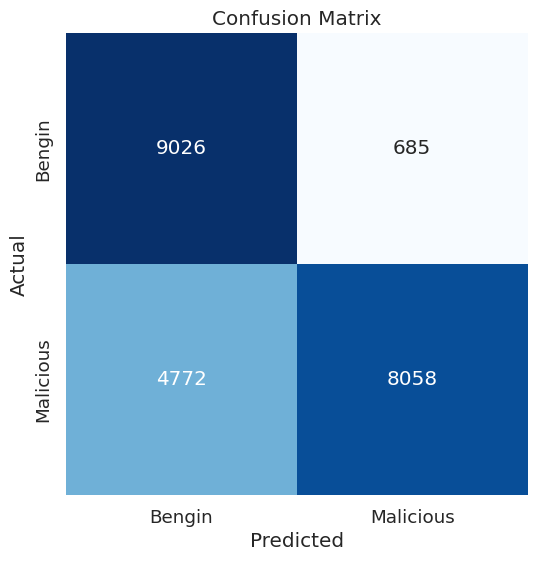

Current feature: protocol_type_icmp
29 features => accuracy: 0.7579078124306818
Previous accuracy: 0.7579078124306818
train dataset shape: (125964, 29)
Max accuracy: 0.7682445321857948
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2507 - accuracy: 0.8959 - val_loss: 0.8531 - val_accuracy: 0.7506
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0921 - accuracy: 0.9674 - val_loss: 1.1582 - val_accuracy: 0.7457
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0662 - accuracy: 0.9770 - val_loss: 1.4045 - val_accuracy: 0.7460
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0570 - accuracy: 0.9804 - val_loss: 1.6257 - val_accuracy: 0.7442
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0531 - accuracy: 0.9820 - val_loss: 1.7458 - val_accuracy: 0.7555
Epoc

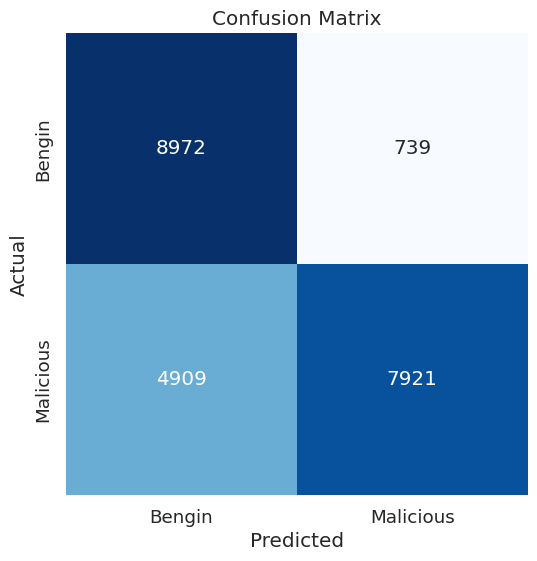

Current feature: dst_host_diff_srv_rate
30 features => accuracy: 0.7494343640477352
Previous accuracy: 0.7494343640477352
train dataset shape: (125964, 30)
Max accuracy: 0.7682445321857948
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2261 - accuracy: 0.9060 - val_loss: 0.8275 - val_accuracy: 0.7540
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.9678 - val_loss: 1.0721 - val_accuracy: 0.7563
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9730 - val_loss: 1.2401 - val_accuracy: 0.7418
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0601 - accuracy: 0.9769 - val_loss: 1.3698 - val_accuracy: 0.7480
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0543 - accuracy: 0.9790 - val_loss: 1.4536 - val_accuracy: 0.7562


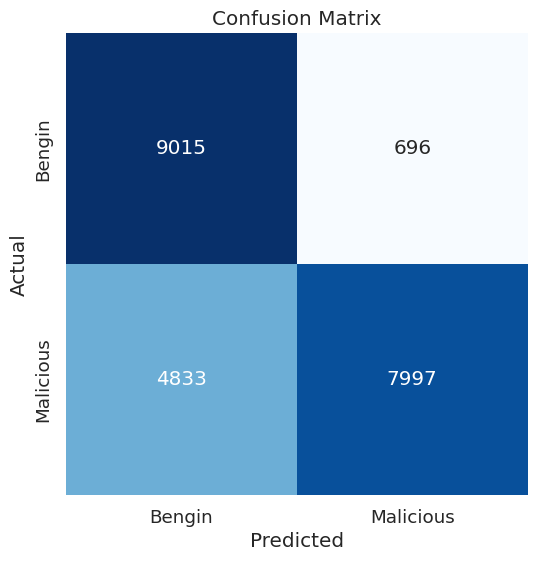

Current feature: service_smtp
31 features => accuracy: 0.7547136329355397
Previous accuracy: 0.7547136329355397
train dataset shape: (125964, 31)
Max accuracy: 0.7682445321857948
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2455 - accuracy: 0.9000 - val_loss: 0.8573 - val_accuracy: 0.7561
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9620 - val_loss: 1.0590 - val_accuracy: 0.7529
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9696 - val_loss: 1.2205 - val_accuracy: 0.7507
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0586 - accuracy: 0.9804 - val_loss: 1.4108 - val_accuracy: 0.7438
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0533 - accuracy: 0.9827 - val_loss: 1.4998 - val_accuracy: 0.7555
Epoch 6/10

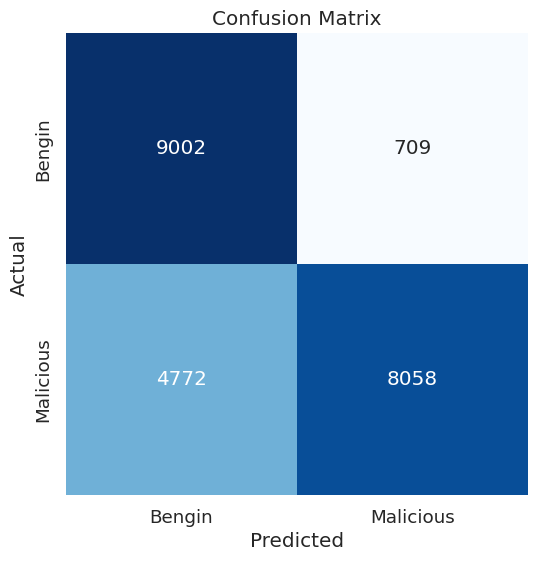

Current feature: service_ftp_data
32 features => accuracy: 0.7568430859323011
Previous accuracy: 0.7568430859323011
train dataset shape: (125964, 32)
Max accuracy: 0.7682445321857948
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2269 - accuracy: 0.9131 - val_loss: 0.8424 - val_accuracy: 0.7537
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0985 - accuracy: 0.9676 - val_loss: 1.0891 - val_accuracy: 0.7442
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0722 - accuracy: 0.9736 - val_loss: 1.3190 - val_accuracy: 0.7399
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0605 - accuracy: 0.9783 - val_loss: 1.5176 - val_accuracy: 0.7452
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0545 - accuracy: 0.9817 - val_loss: 1.5551 - val_accuracy: 0.7443
Epoch 

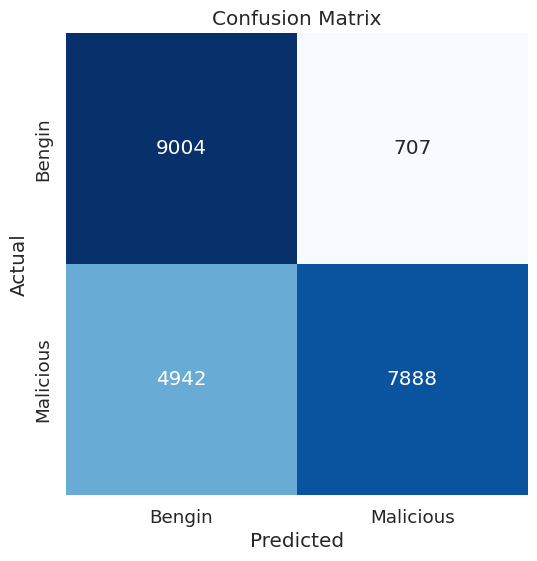

Current feature: service_other
33 features => accuracy: 0.749390000443636
Previous accuracy: 0.749390000443636
train dataset shape: (125964, 33)
Max accuracy: 0.7682445321857948
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2137 - accuracy: 0.9236 - val_loss: 0.8967 - val_accuracy: 0.7511
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1018 - accuracy: 0.9674 - val_loss: 1.1667 - val_accuracy: 0.7364
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0740 - accuracy: 0.9717 - val_loss: 1.3337 - val_accuracy: 0.7359
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0619 - accuracy: 0.9744 - val_loss: 1.5426 - val_accuracy: 0.7384
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0569 - accuracy: 0.9765 - val_loss: 1.6180 - val_accuracy: 0.7367
Epoch 6/10


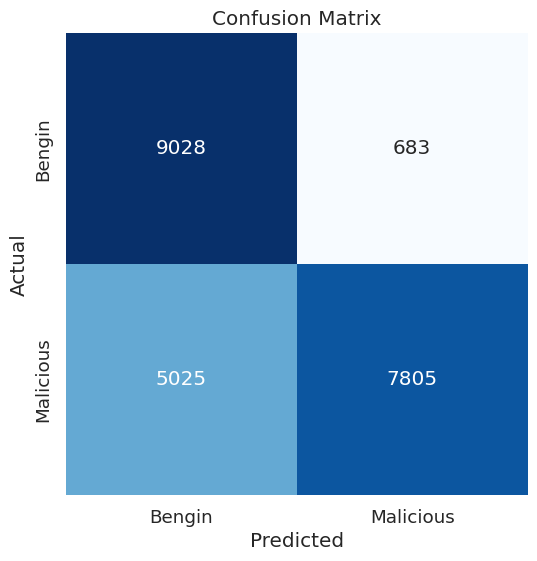

Current feature: service_eco_i
34 features => accuracy: 0.7467725478017834
Previous accuracy: 0.7467725478017834
train dataset shape: (125964, 34)
Max accuracy: 0.7682445321857948
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2208 - accuracy: 0.9156 - val_loss: 0.8536 - val_accuracy: 0.7499
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9658 - val_loss: 1.1379 - val_accuracy: 0.7470
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9696 - val_loss: 1.2792 - val_accuracy: 0.7483
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0633 - accuracy: 0.9729 - val_loss: 1.4676 - val_accuracy: 0.7461
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0580 - accuracy: 0.9753 - val_loss: 1.5800 - val_accuracy: 0.7497
Epoch 6/1

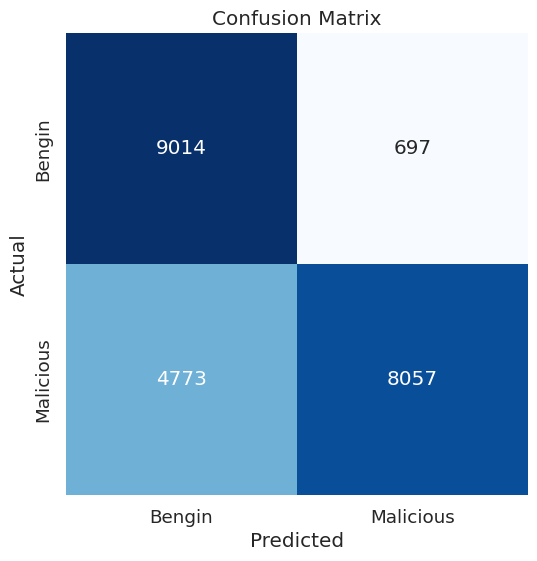

Current feature: service_telnet
35 features => accuracy: 0.7573310855773923
Previous accuracy: 0.7573310855773923
train dataset shape: (125964, 35)
Max accuracy: 0.7682445321857948
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2190 - accuracy: 0.9169 - val_loss: 0.8570 - val_accuracy: 0.7410
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0893 - accuracy: 0.9687 - val_loss: 1.1388 - val_accuracy: 0.7408
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9750 - val_loss: 1.2838 - val_accuracy: 0.7429
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0531 - accuracy: 0.9811 - val_loss: 1.4994 - val_accuracy: 0.7450
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0481 - accuracy: 0.9835 - val_loss: 1.6646 - val_accuracy: 0.7485
Epoch 6/

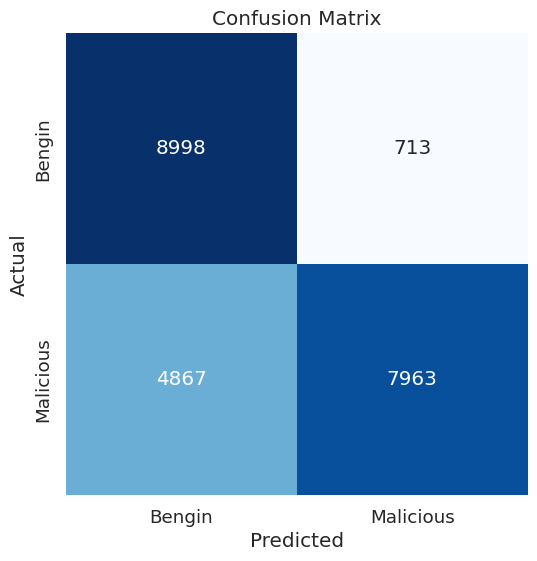

Current feature: dst_host_srv_diff_host_rate
36 features => accuracy: 0.7524510891264806
Previous accuracy: 0.7524510891264806
train dataset shape: (125964, 36)
Max accuracy: 0.7682445321857948
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2454 - accuracy: 0.9027 - val_loss: 0.8670 - val_accuracy: 0.7459
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9688 - val_loss: 1.1628 - val_accuracy: 0.7333
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9749 - val_loss: 1.2856 - val_accuracy: 0.7398
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0555 - accuracy: 0.9789 - val_loss: 1.3995 - val_accuracy: 0.7446
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9816 - val_loss: 1.4830 - val_accuracy: 0.

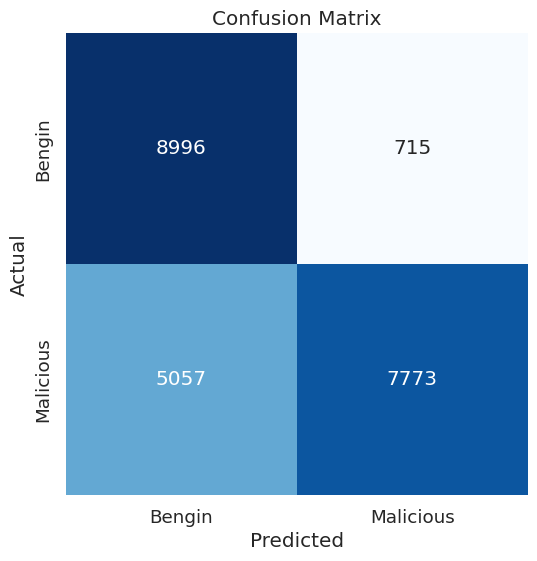

Current feature: service_ecr_i
37 features => accuracy: 0.7439332771394348
Previous accuracy: 0.7439332771394348
train dataset shape: (125964, 37)
Max accuracy: 0.7682445321857948
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2358 - accuracy: 0.9074 - val_loss: 0.8408 - val_accuracy: 0.7414
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9688 - val_loss: 1.1450 - val_accuracy: 0.7402
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0634 - accuracy: 0.9754 - val_loss: 1.3643 - val_accuracy: 0.7426
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0553 - accuracy: 0.9798 - val_loss: 1.4969 - val_accuracy: 0.7497
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9826 - val_loss: 1.6183 - val_accuracy: 0.7567
Epoch 6/1

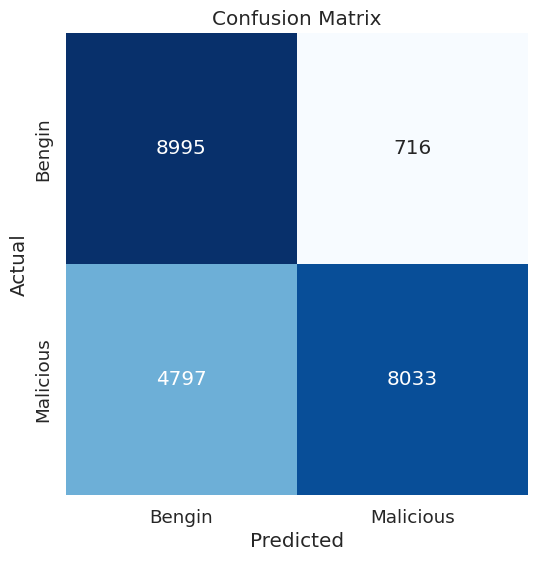

Current feature: wrong_fragment
38 features => accuracy: 0.7554234506011268
Previous accuracy: 0.7554234506011268
train dataset shape: (125964, 38)
Max accuracy: 0.7682445321857948
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2325 - accuracy: 0.9102 - val_loss: 0.8547 - val_accuracy: 0.7785
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9679 - val_loss: 1.1439 - val_accuracy: 0.7678
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9740 - val_loss: 1.3474 - val_accuracy: 0.7691
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0572 - accuracy: 0.9785 - val_loss: 1.4753 - val_accuracy: 0.7702
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0498 - accuracy: 0.9812 - val_loss: 1.6274 - val_accuracy: 0.7834
Epoch 6/

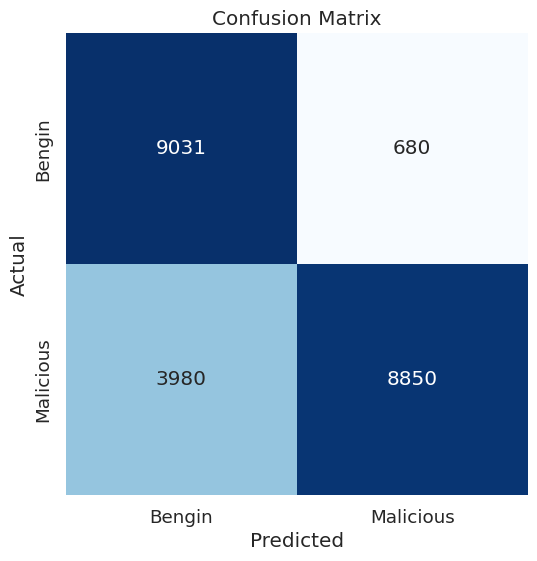

Current feature: flag_RSTR
39 features => accuracy: 0.7932656048977419
Previous accuracy: 0.7932656048977419
train dataset shape: (125964, 39)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2568 - accuracy: 0.8947 - val_loss: 0.7698 - val_accuracy: 0.7772
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.9673 - val_loss: 1.1233 - val_accuracy: 0.7695
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9739 - val_loss: 1.2725 - val_accuracy: 0.7767
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0581 - accuracy: 0.9771 - val_loss: 1.4779 - val_accuracy: 0.7812
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0521 - accuracy: 0.9797 - val_loss: 1.6269 - val_accuracy: 0.7830
Epoch 6/10
49

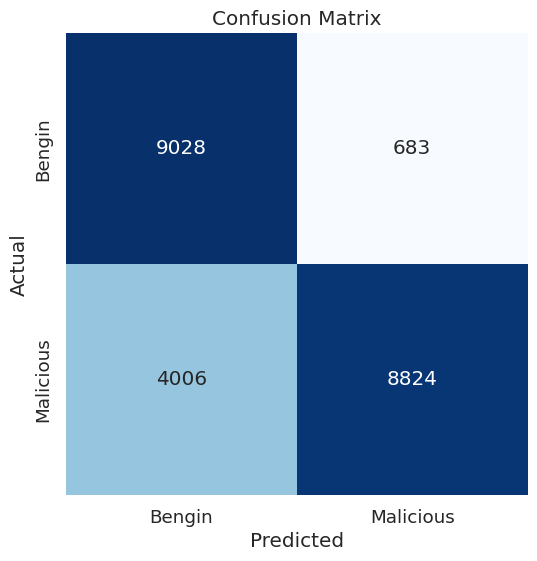

Current feature: service_ftp
40 features => accuracy: 0.7919790603788652
Previous accuracy: 0.7919790603788652
train dataset shape: (125964, 40)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2282 - accuracy: 0.9081 - val_loss: 0.8238 - val_accuracy: 0.7483
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.9709 - val_loss: 1.0846 - val_accuracy: 0.7696
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0616 - accuracy: 0.9772 - val_loss: 1.2686 - val_accuracy: 0.7679
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0523 - accuracy: 0.9818 - val_loss: 1.4601 - val_accuracy: 0.7765
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0452 - accuracy: 0.9839 - val_loss: 1.5705 - val_accuracy: 0.7896
Epoch 6/10


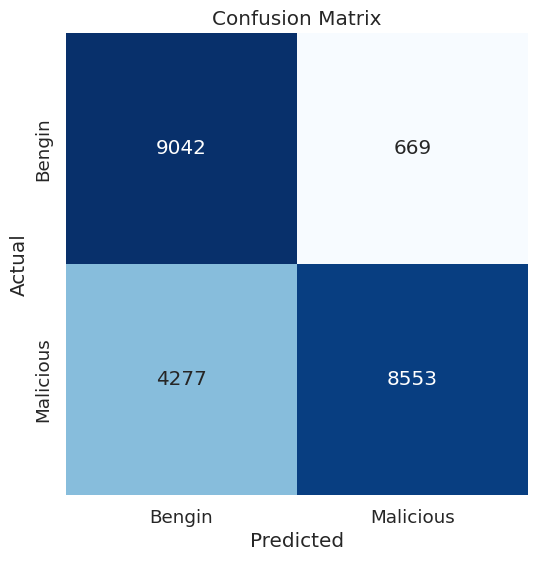

Current feature: flag_RSTO
41 features => accuracy: 0.7805776141253715
Previous accuracy: 0.7805776141253715
train dataset shape: (125964, 41)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2198 - accuracy: 0.9121 - val_loss: 0.8614 - val_accuracy: 0.7428
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0880 - accuracy: 0.9717 - val_loss: 1.1506 - val_accuracy: 0.7391
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0662 - accuracy: 0.9762 - val_loss: 1.1821 - val_accuracy: 0.7427
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0569 - accuracy: 0.9780 - val_loss: 1.3748 - val_accuracy: 0.7411
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0519 - accuracy: 0.9804 - val_loss: 1.5031 - val_accuracy: 0.7475
Epoch 6/10
49

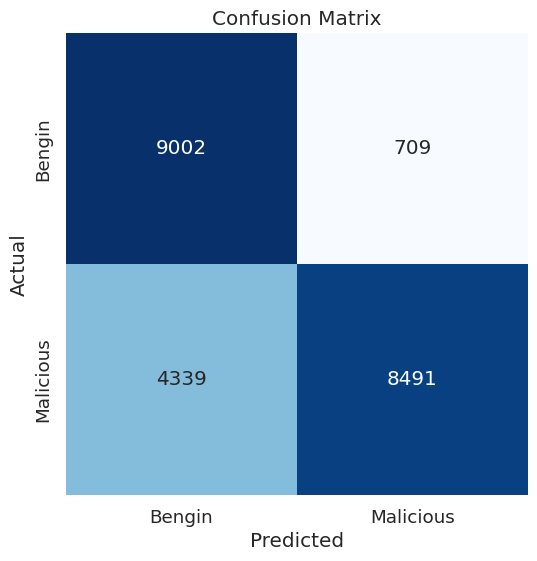

Current feature: service_finger
42 features => accuracy: 0.7760525265072534
Previous accuracy: 0.7760525265072534
train dataset shape: (125964, 42)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2365 - accuracy: 0.9122 - val_loss: 0.9170 - val_accuracy: 0.7442
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0947 - accuracy: 0.9690 - val_loss: 1.3193 - val_accuracy: 0.7456
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9742 - val_loss: 1.5558 - val_accuracy: 0.7521
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0565 - accuracy: 0.9768 - val_loss: 1.7451 - val_accuracy: 0.7634
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0510 - accuracy: 0.9792 - val_loss: 1.9179 - val_accuracy: 0.7738
Epoch 6/

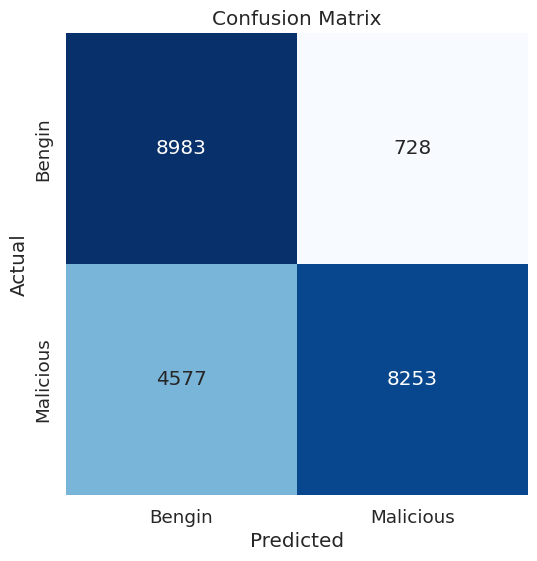

Current feature: is_guest_login
43 features => accuracy: 0.7646510802537598
Previous accuracy: 0.7646510802537598
train dataset shape: (125964, 43)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2507 - accuracy: 0.9060 - val_loss: 0.7635 - val_accuracy: 0.7470
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1010 - accuracy: 0.9671 - val_loss: 1.0978 - val_accuracy: 0.7340
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0697 - accuracy: 0.9745 - val_loss: 1.3486 - val_accuracy: 0.7389
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0565 - accuracy: 0.9808 - val_loss: 1.6064 - val_accuracy: 0.7553
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0491 - accuracy: 0.9836 - val_loss: 1.7865 - val_accuracy: 0.7462
Epoch 6/

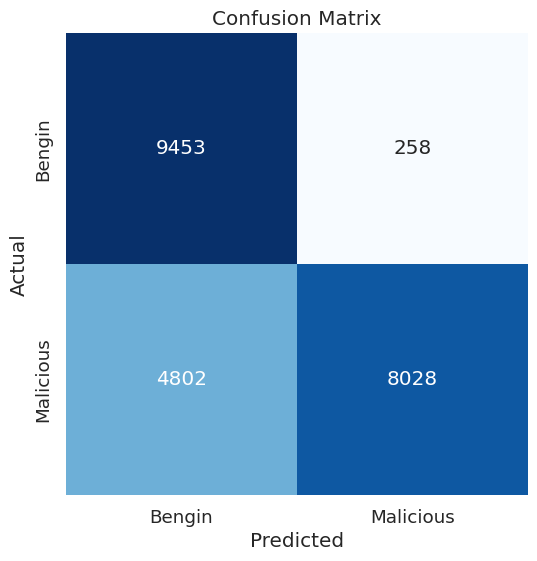

Current feature: service_pop_3
44 features => accuracy: 0.7755201632580631
Previous accuracy: 0.7755201632580631
train dataset shape: (125964, 44)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2385 - accuracy: 0.9075 - val_loss: 0.8101 - val_accuracy: 0.7582
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0969 - accuracy: 0.9683 - val_loss: 1.3464 - val_accuracy: 0.7464
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9750 - val_loss: 1.6960 - val_accuracy: 0.7494
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0568 - accuracy: 0.9798 - val_loss: 1.8388 - val_accuracy: 0.7576
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0488 - accuracy: 0.9835 - val_loss: 1.9200 - val_accuracy: 0.7737
Epoch 6/1

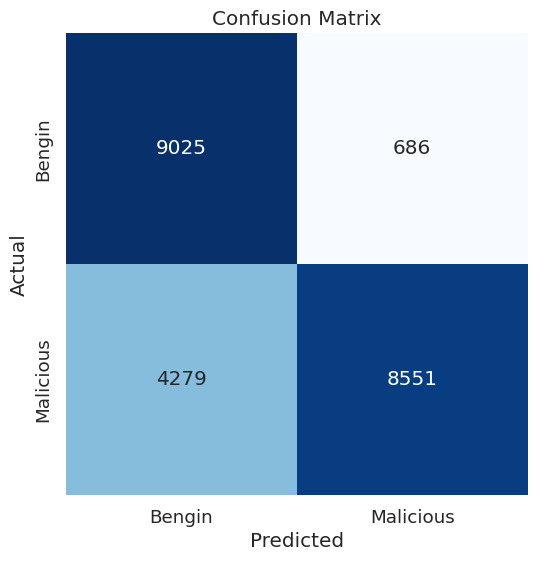

Current feature: service_auth
45 features => accuracy: 0.7797347056474868
Previous accuracy: 0.7797347056474868
train dataset shape: (125964, 45)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2449 - accuracy: 0.9043 - val_loss: 0.8729 - val_accuracy: 0.7482
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0987 - accuracy: 0.9699 - val_loss: 1.2734 - val_accuracy: 0.7528
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9769 - val_loss: 1.6147 - val_accuracy: 0.7556
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0576 - accuracy: 0.9824 - val_loss: 1.8871 - val_accuracy: 0.7533
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 1.9503 - val_accuracy: 0.7779
Epoch 6/10

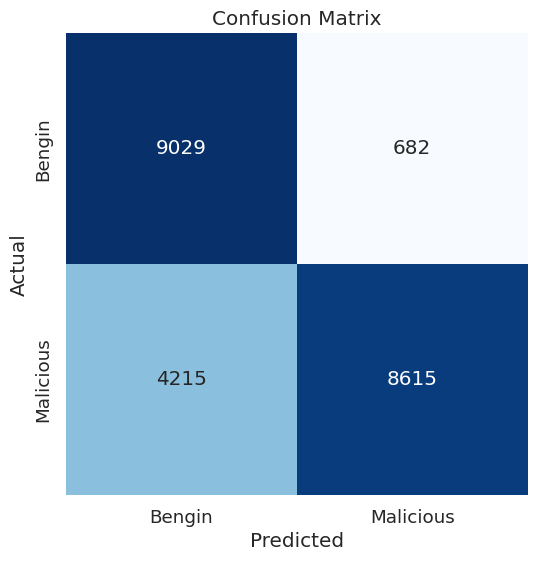

Current feature: service_imap4
46 features => accuracy: 0.7827514307262322
Previous accuracy: 0.7827514307262322
train dataset shape: (125964, 46)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2469 - accuracy: 0.9054 - val_loss: 0.9391 - val_accuracy: 0.7507
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.9678 - val_loss: 1.4746 - val_accuracy: 0.7581
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9736 - val_loss: 1.7046 - val_accuracy: 0.7648
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0571 - accuracy: 0.9770 - val_loss: 1.9517 - val_accuracy: 0.7685
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0498 - accuracy: 0.9811 - val_loss: 2.0726 - val_accuracy: 0.7814
Epoch 6/1

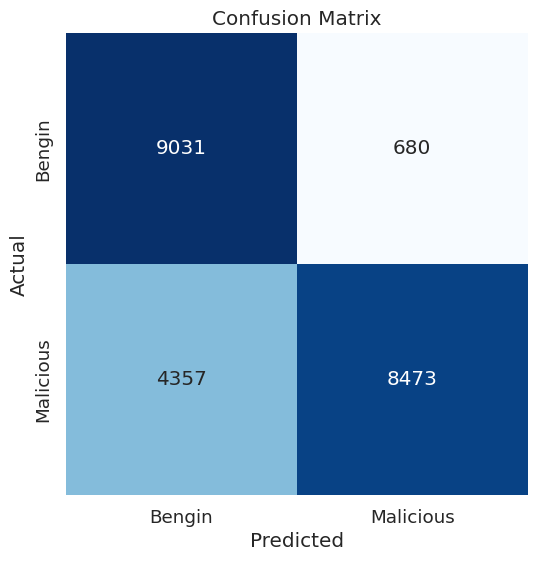

Current feature: service_Z39_50
47 features => accuracy: 0.7765405261523446
Previous accuracy: 0.7765405261523446
train dataset shape: (125964, 47)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2301 - accuracy: 0.9065 - val_loss: 0.9457 - val_accuracy: 0.7816
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.9666 - val_loss: 1.3088 - val_accuracy: 0.7740
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9729 - val_loss: 1.5165 - val_accuracy: 0.7687
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0521 - accuracy: 0.9796 - val_loss: 1.7633 - val_accuracy: 0.7755
Epoch 5/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0489 - accuracy: 0.9810 - val_loss: 1.8770 - val_accuracy: 0.7711
Epoch 6/

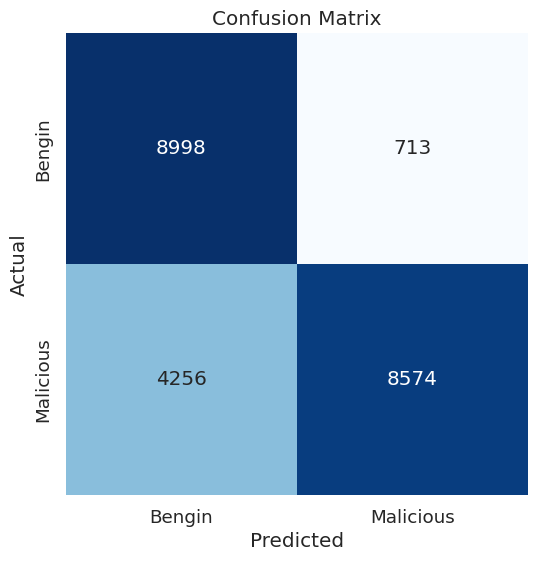

Current feature: service_uucp
48 features => accuracy: 0.77955725123109
Previous accuracy: 0.77955725123109
train dataset shape: (125964, 48)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2486 - accuracy: 0.9062 - val_loss: 0.8588 - val_accuracy: 0.7464
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1039 - accuracy: 0.9702 - val_loss: 1.1751 - val_accuracy: 0.7379
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9761 - val_loss: 1.5422 - val_accuracy: 0.7414
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0622 - accuracy: 0.9810 - val_loss: 1.7791 - val_accuracy: 0.7486
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0541 - accuracy: 0.9834 - val_loss: 1.8169 - val_accuracy: 0.7666
Epoch 6/10
493

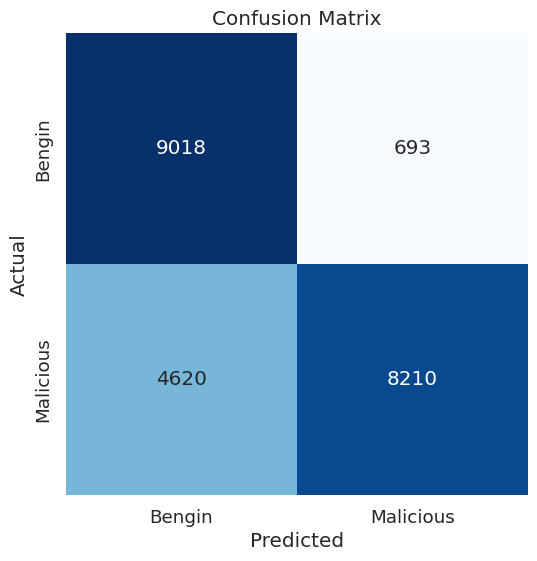

Current feature: service_courier
49 features => accuracy: 0.7642961714209663
Previous accuracy: 0.7642961714209663
train dataset shape: (125964, 49)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2329 - accuracy: 0.9100 - val_loss: 0.8997 - val_accuracy: 0.7384
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0928 - accuracy: 0.9713 - val_loss: 1.2931 - val_accuracy: 0.7322
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0667 - accuracy: 0.9761 - val_loss: 1.5481 - val_accuracy: 0.7346
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0562 - accuracy: 0.9795 - val_loss: 1.7480 - val_accuracy: 0.7349
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0504 - accuracy: 0.9813 - val_loss: 2.0440 - val_accuracy: 0.7427
Epoch 6

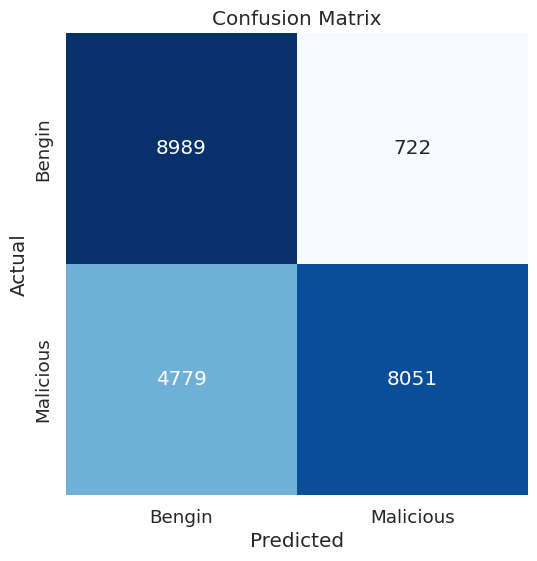

Current feature: service_bgp
50 features => accuracy: 0.7559558138503172
Previous accuracy: 0.7559558138503172
train dataset shape: (125964, 50)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2203 - accuracy: 0.9153 - val_loss: 1.0749 - val_accuracy: 0.7446
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9713 - val_loss: 1.4415 - val_accuracy: 0.7611
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9763 - val_loss: 1.5645 - val_accuracy: 0.7718
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0530 - accuracy: 0.9805 - val_loss: 1.8461 - val_accuracy: 0.7748
Epoch 5/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0476 - accuracy: 0.9828 - val_loss: 2.0146 - val_accuracy: 0.7798
Epoch 6/10


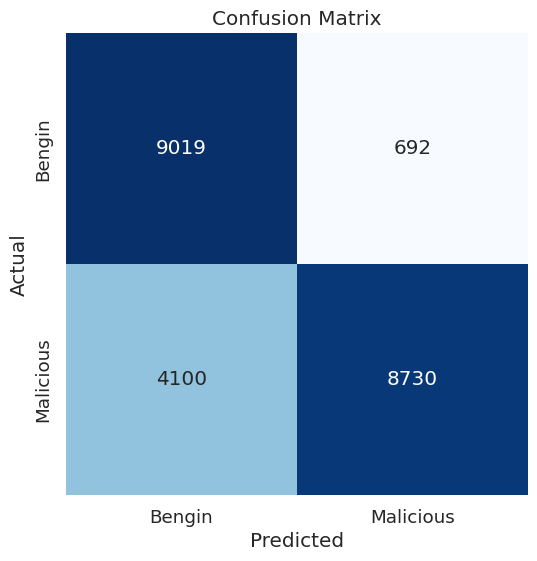

Current feature: service_iso_tsap
51 features => accuracy: 0.7874096091566479
Previous accuracy: 0.7874096091566479
train dataset shape: (125964, 51)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2191 - accuracy: 0.9216 - val_loss: 0.7640 - val_accuracy: 0.7575
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0920 - accuracy: 0.9716 - val_loss: 1.0812 - val_accuracy: 0.7711
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9766 - val_loss: 1.3833 - val_accuracy: 0.7713
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0576 - accuracy: 0.9790 - val_loss: 1.6005 - val_accuracy: 0.7721
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0523 - accuracy: 0.9803 - val_loss: 1.7397 - val_accuracy: 0.7762
Epoch 

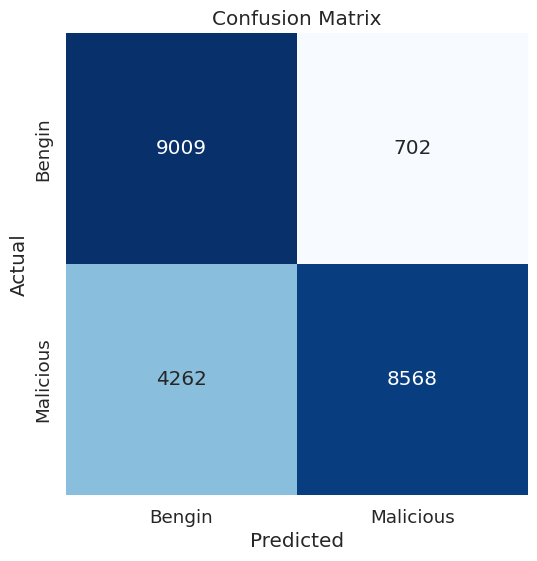

Current feature: service_uucp_path
52 features => accuracy: 0.779779069251586
Previous accuracy: 0.779779069251586
train dataset shape: (125964, 52)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2336 - accuracy: 0.9118 - val_loss: 0.7940 - val_accuracy: 0.7707
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9658 - val_loss: 1.1463 - val_accuracy: 0.7598
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9712 - val_loss: 1.4279 - val_accuracy: 0.7638
Epoch 4/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0560 - accuracy: 0.9759 - val_loss: 1.7939 - val_accuracy: 0.7694
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 1.7280 - val_accuracy: 0.7830
Epoch 6

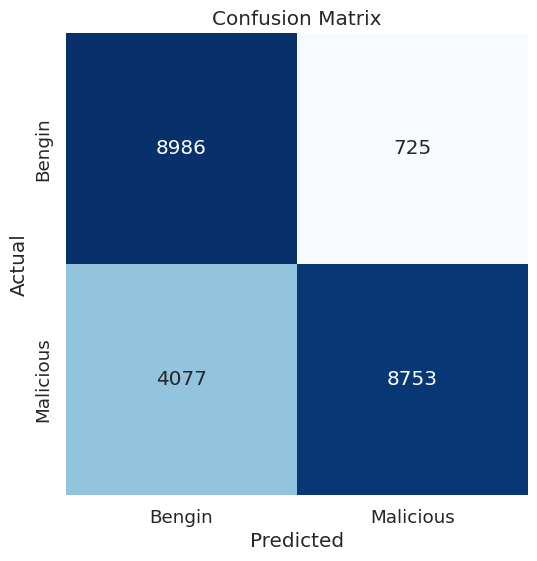

Current feature: num_file_creations
53 features => accuracy: 0.786965973115656
Previous accuracy: 0.786965973115656
train dataset shape: (125964, 53)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2401 - accuracy: 0.9105 - val_loss: 0.7797 - val_accuracy: 0.7500
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0930 - accuracy: 0.9676 - val_loss: 1.1966 - val_accuracy: 0.7439
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0671 - accuracy: 0.9744 - val_loss: 1.4582 - val_accuracy: 0.7543
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0553 - accuracy: 0.9786 - val_loss: 1.7062 - val_accuracy: 0.7636
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0493 - accuracy: 0.9811 - val_loss: 1.8319 - val_accuracy: 0.7854
Epoch 

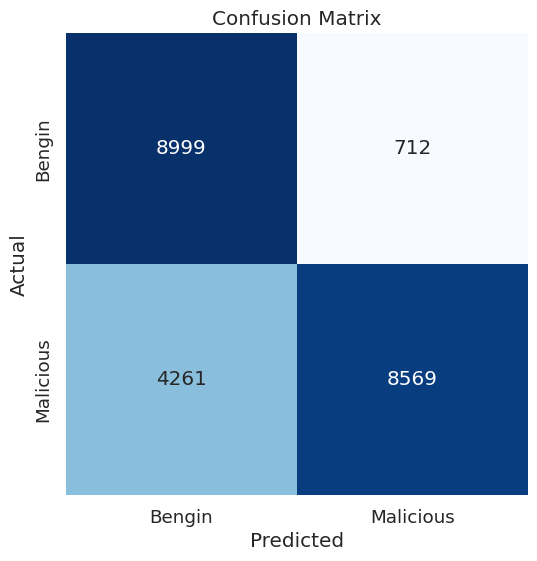

Current feature: service_whois
54 features => accuracy: 0.7793797968146933
Previous accuracy: 0.7793797968146933
train dataset shape: (125964, 54)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2261 - accuracy: 0.9165 - val_loss: 0.9315 - val_accuracy: 0.7545
Epoch 2/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0949 - accuracy: 0.9735 - val_loss: 1.2177 - val_accuracy: 0.7489
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9771 - val_loss: 1.4924 - val_accuracy: 0.7450
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0581 - accuracy: 0.9805 - val_loss: 1.6608 - val_accuracy: 0.7481
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0545 - accuracy: 0.9819 - val_loss: 1.7812 - val_accuracy: 0.7574
Epoch 6/1

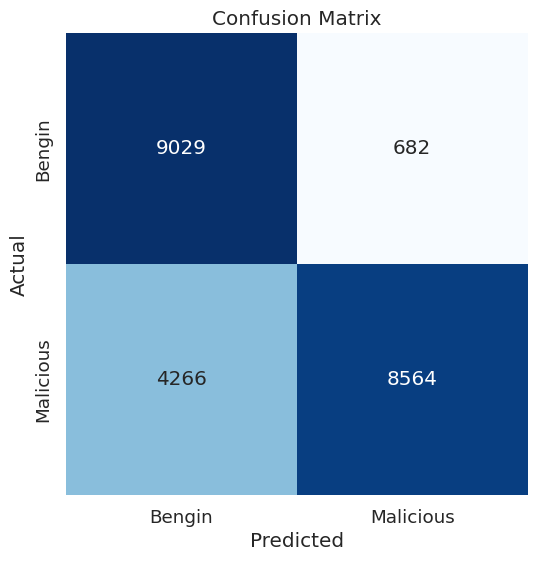

Current feature: src_bytes
55 features => accuracy: 0.7804888869171731
Previous accuracy: 0.7804888869171731
train dataset shape: (125964, 55)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2240 - accuracy: 0.9147 - val_loss: 0.9961 - val_accuracy: 0.7375
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9697 - val_loss: 1.4621 - val_accuracy: 0.7431
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0636 - accuracy: 0.9760 - val_loss: 1.6693 - val_accuracy: 0.7522
Epoch 4/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0539 - accuracy: 0.9788 - val_loss: 1.9626 - val_accuracy: 0.7674
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0491 - accuracy: 0.9807 - val_loss: 2.1439 - val_accuracy: 0.7720
Epoch 6/10
49

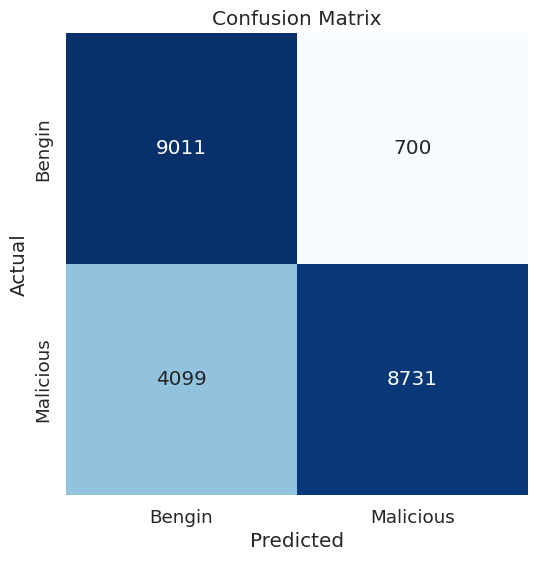

Current feature: num_root
56 features => accuracy: 0.7870990639279535
Previous accuracy: 0.7870990639279535
train dataset shape: (125964, 56)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2250 - accuracy: 0.9200 - val_loss: 0.9085 - val_accuracy: 0.7563
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0920 - accuracy: 0.9718 - val_loss: 1.2966 - val_accuracy: 0.7413
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9755 - val_loss: 1.5601 - val_accuracy: 0.7407
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0586 - accuracy: 0.9789 - val_loss: 1.8656 - val_accuracy: 0.7426
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0520 - accuracy: 0.9811 - val_loss: 2.1396 - val_accuracy: 0.7648
Epoch 6/10
493

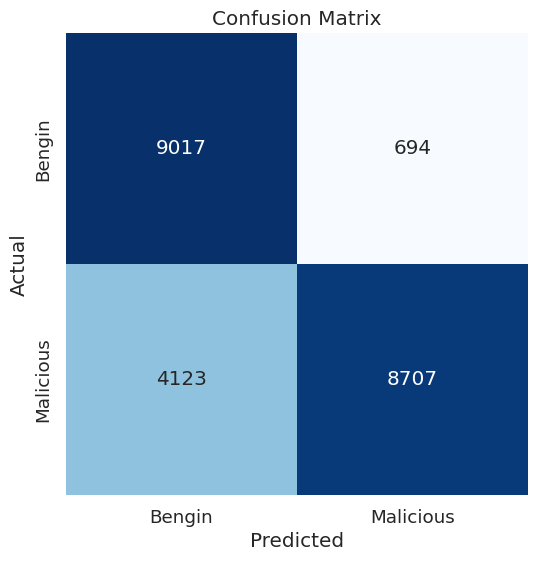

Current feature: service_time
57 features => accuracy: 0.786300519054168
Previous accuracy: 0.786300519054168
train dataset shape: (125964, 57)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2223 - accuracy: 0.9139 - val_loss: 1.1686 - val_accuracy: 0.7577
Epoch 2/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0887 - accuracy: 0.9711 - val_loss: 1.5550 - val_accuracy: 0.7572
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0646 - accuracy: 0.9767 - val_loss: 1.7146 - val_accuracy: 0.7651
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0547 - accuracy: 0.9812 - val_loss: 1.8926 - val_accuracy: 0.7659
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0468 - accuracy: 0.9833 - val_loss: 2.0859 - val_accuracy: 0.7690
Epoch 6/10
4

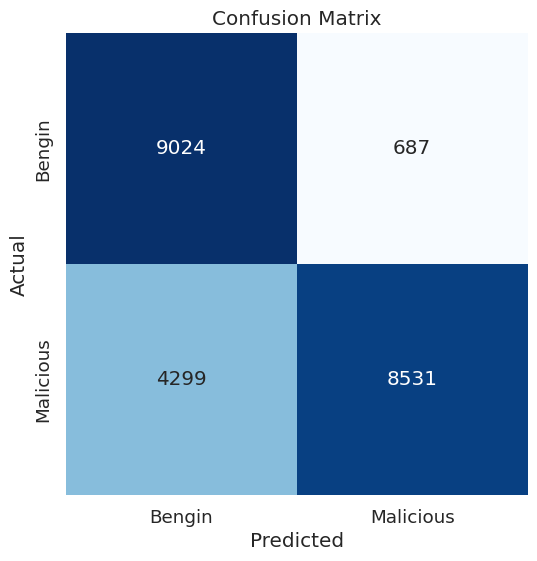

Current feature: service_nnsp
58 features => accuracy: 0.7788030699614037
Previous accuracy: 0.7788030699614037
train dataset shape: (125964, 58)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2696 - accuracy: 0.8950 - val_loss: 0.8556 - val_accuracy: 0.7764
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1093 - accuracy: 0.9560 - val_loss: 1.3707 - val_accuracy: 0.7570
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9708 - val_loss: 1.6893 - val_accuracy: 0.7602
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0631 - accuracy: 0.9788 - val_loss: 2.0831 - val_accuracy: 0.7637
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0570 - accuracy: 0.9821 - val_loss: 2.2242 - val_accuracy: 0.7766
Epoch 6/10

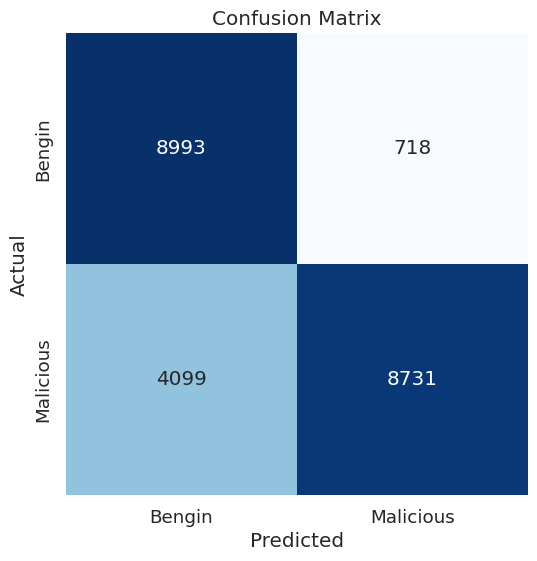

Current feature: num_compromised
59 features => accuracy: 0.786300519054168
Previous accuracy: 0.786300519054168
train dataset shape: (125964, 59)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2297 - accuracy: 0.9121 - val_loss: 0.9363 - val_accuracy: 0.7476
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0875 - accuracy: 0.9715 - val_loss: 1.3599 - val_accuracy: 0.7424
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0644 - accuracy: 0.9772 - val_loss: 1.5851 - val_accuracy: 0.7621
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0535 - accuracy: 0.9812 - val_loss: 1.8657 - val_accuracy: 0.7666
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0482 - accuracy: 0.9841 - val_loss: 1.8852 - val_accuracy: 0.7802
Epoch 6/1

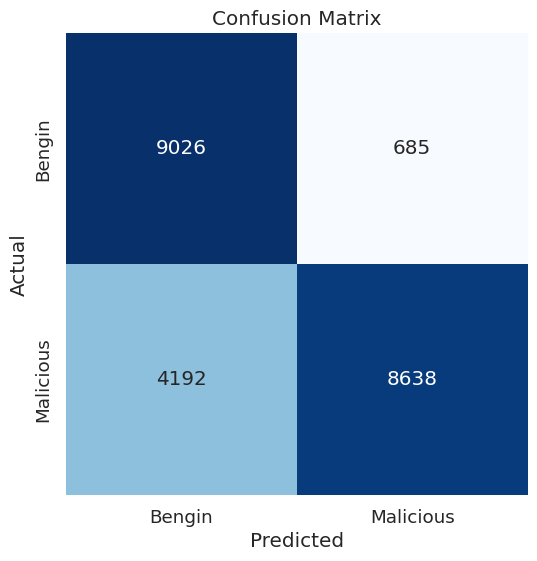

Current feature: dst_bytes
60 features => accuracy: 0.7836387028082161
Previous accuracy: 0.7836387028082161
train dataset shape: (125964, 60)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2276 - accuracy: 0.9146 - val_loss: 0.9560 - val_accuracy: 0.7687
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0871 - accuracy: 0.9714 - val_loss: 1.3526 - val_accuracy: 0.7637
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0634 - accuracy: 0.9764 - val_loss: 1.5333 - val_accuracy: 0.7702
Epoch 4/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9814 - val_loss: 1.7099 - val_accuracy: 0.7811
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0470 - accuracy: 0.9840 - val_loss: 1.8799 - val_accuracy: 0.7796
Epoch 6/10
49

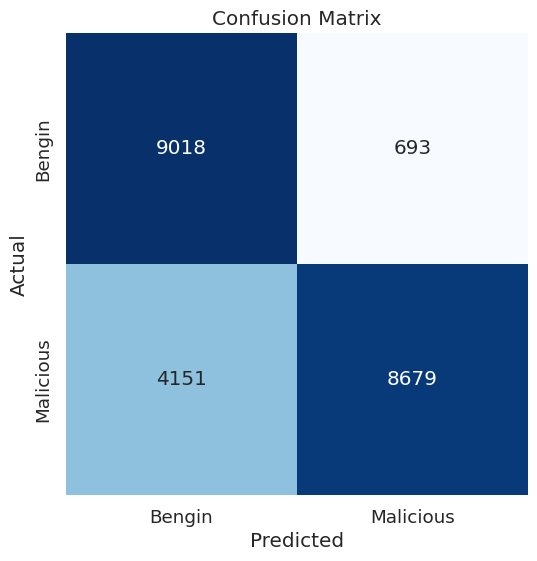

Current feature: service_vmnet
61 features => accuracy: 0.7851027017434896
Previous accuracy: 0.7851027017434896
train dataset shape: (125964, 61)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2241 - accuracy: 0.9112 - val_loss: 0.8280 - val_accuracy: 0.7560
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9712 - val_loss: 1.2834 - val_accuracy: 0.7580
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0628 - accuracy: 0.9763 - val_loss: 1.4834 - val_accuracy: 0.7543
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0538 - accuracy: 0.9800 - val_loss: 1.7507 - val_accuracy: 0.7452
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0478 - accuracy: 0.9831 - val_loss: 1.9780 - val_accuracy: 0.7624
Epoch 6/1

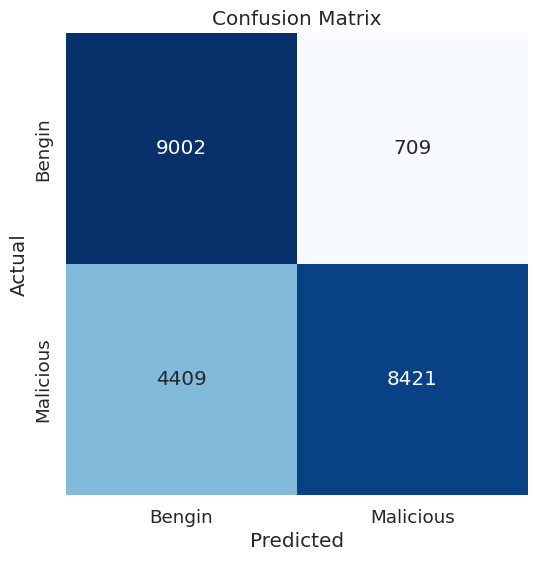

Current feature: service_urp_i
62 features => accuracy: 0.7729470742203096
Previous accuracy: 0.7729470742203096
train dataset shape: (125964, 62)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 3s 4ms/step - loss: 0.2369 - accuracy: 0.9124 - val_loss: 0.8361 - val_accuracy: 0.7690
Epoch 2/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0985 - accuracy: 0.9704 - val_loss: 1.3051 - val_accuracy: 0.7678
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.9793 - val_loss: 1.4933 - val_accuracy: 0.7709
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0588 - accuracy: 0.9832 - val_loss: 1.8412 - val_accuracy: 0.7757
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0520 - accuracy: 0.9851 - val_loss: 1.9504 - val_accuracy: 0.7834
Epoch 6/1

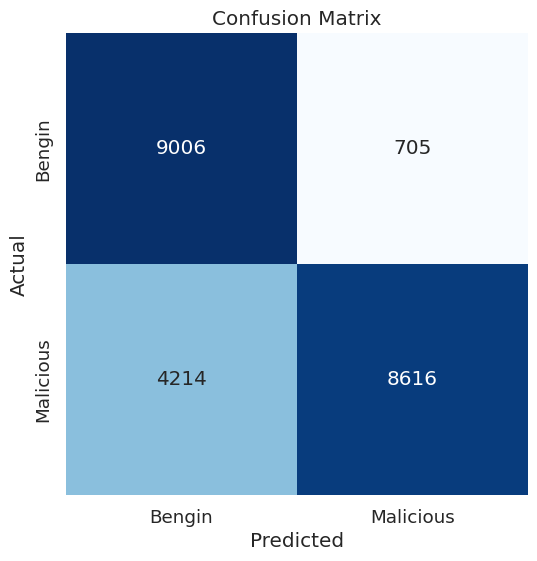

Current feature: num_failed_logins
63 features => accuracy: 0.7817754314360499
Previous accuracy: 0.7817754314360499
train dataset shape: (125964, 63)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2481 - accuracy: 0.9089 - val_loss: 0.8485 - val_accuracy: 0.7561
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.1080 - accuracy: 0.9687 - val_loss: 1.3062 - val_accuracy: 0.7481
Epoch 3/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0769 - accuracy: 0.9769 - val_loss: 1.5949 - val_accuracy: 0.7556
Epoch 4/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0.9821 - val_loss: 1.9785 - val_accuracy: 0.7685
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0549 - accuracy: 0.9845 - val_loss: 2.2422 - val_accuracy: 0.7758
Epoch

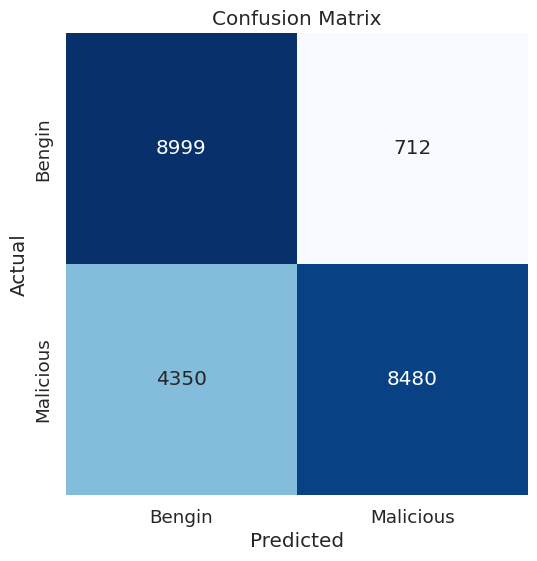

Current feature: service_domain
64 features => accuracy: 0.7754314360498646
Previous accuracy: 0.7754314360498646
train dataset shape: (125964, 64)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2303 - accuracy: 0.9168 - val_loss: 0.9418 - val_accuracy: 0.7367
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.9720 - val_loss: 1.3245 - val_accuracy: 0.7403
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9763 - val_loss: 1.5586 - val_accuracy: 0.7459
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0540 - accuracy: 0.9804 - val_loss: 1.7829 - val_accuracy: 0.7639
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0458 - accuracy: 0.9845 - val_loss: 2.0136 - val_accuracy: 0.7702
Epoch 6/

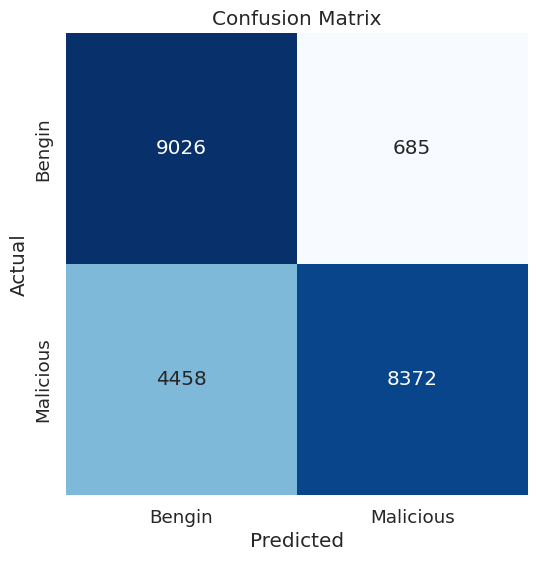

Current feature: service_ctf
65 features => accuracy: 0.7718379841178298
Previous accuracy: 0.7718379841178298
train dataset shape: (125964, 65)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2416 - accuracy: 0.9085 - val_loss: 0.8795 - val_accuracy: 0.7537
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9691 - val_loss: 1.3554 - val_accuracy: 0.7516
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9746 - val_loss: 1.5856 - val_accuracy: 0.7576
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0531 - accuracy: 0.9790 - val_loss: 1.8106 - val_accuracy: 0.7657
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0478 - accuracy: 0.9819 - val_loss: 1.9493 - val_accuracy: 0.7727
Epoch 6/10


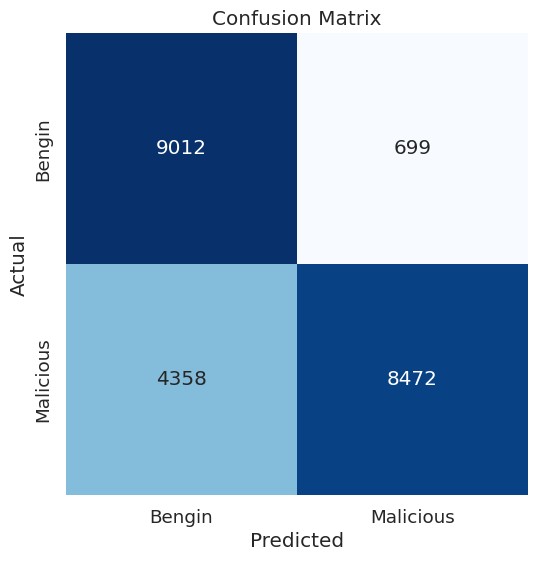

Current feature: service_csnet_ns
66 features => accuracy: 0.7756532540703607
Previous accuracy: 0.7756532540703607
train dataset shape: (125964, 66)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2361 - accuracy: 0.9103 - val_loss: 0.8869 - val_accuracy: 0.7375
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0946 - accuracy: 0.9729 - val_loss: 1.2922 - val_accuracy: 0.7628
Epoch 3/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9789 - val_loss: 1.4722 - val_accuracy: 0.7633
Epoch 4/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0576 - accuracy: 0.9832 - val_loss: 1.6033 - val_accuracy: 0.7654
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 1.8126 - val_accuracy: 0.7685
Epoch 

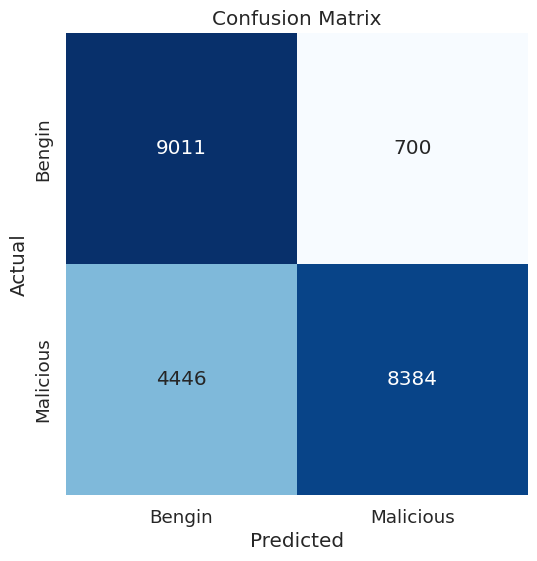

Current feature: service_supdup
67 features => accuracy: 0.7717048933055322
Previous accuracy: 0.7717048933055322
train dataset shape: (125964, 67)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2605 - accuracy: 0.9093 - val_loss: 0.9559 - val_accuracy: 0.7646
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy: 0.9694 - val_loss: 1.3382 - val_accuracy: 0.7694
Epoch 3/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9735 - val_loss: 1.6227 - val_accuracy: 0.7670
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0558 - accuracy: 0.9775 - val_loss: 1.8366 - val_accuracy: 0.7608
Epoch 5/10
493/493 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9828 - val_loss: 1.9724 - val_accuracy: 0.7799
Epoch 6/

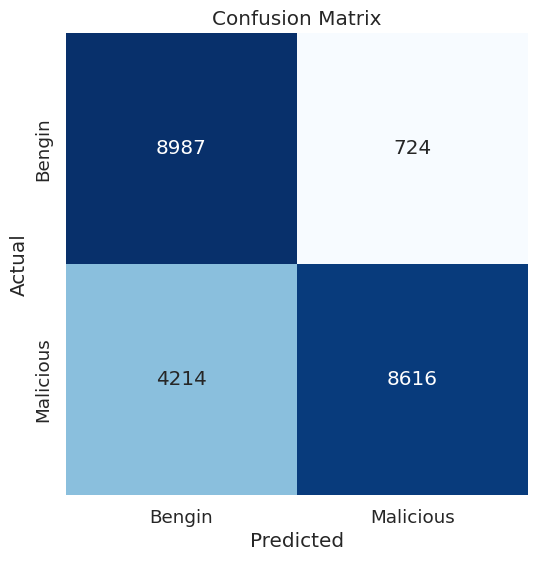

Current feature: service_http_443
68 features => accuracy: 0.7809325229581652
Previous accuracy: 0.7809325229581652
train dataset shape: (125964, 68)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 2ms/step - loss: 0.2536 - accuracy: 0.8991 - val_loss: 0.9264 - val_accuracy: 0.7490
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9667 - val_loss: 1.4802 - val_accuracy: 0.7407
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0686 - accuracy: 0.9741 - val_loss: 1.6954 - val_accuracy: 0.7497
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0565 - accuracy: 0.9784 - val_loss: 2.0129 - val_accuracy: 0.7629
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0485 - accuracy: 0.9832 - val_loss: 2.1676 - val_accuracy: 0.7725
Epoch 

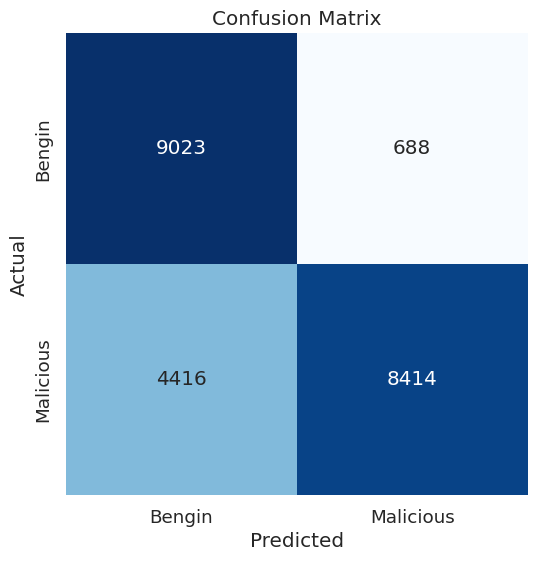

Current feature: service_discard
69 features => accuracy: 0.7735681646776984
Previous accuracy: 0.7735681646776984
train dataset shape: (125964, 69)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2240 - accuracy: 0.9149 - val_loss: 1.0291 - val_accuracy: 0.7570
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9685 - val_loss: 1.4103 - val_accuracy: 0.7484
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0664 - accuracy: 0.9732 - val_loss: 1.7298 - val_accuracy: 0.7514
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0543 - accuracy: 0.9773 - val_loss: 2.0409 - val_accuracy: 0.7676
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.0490 - accuracy: 0.9802 - val_loss: 2.1839 - val_accuracy: 0.7721
Epoch 6

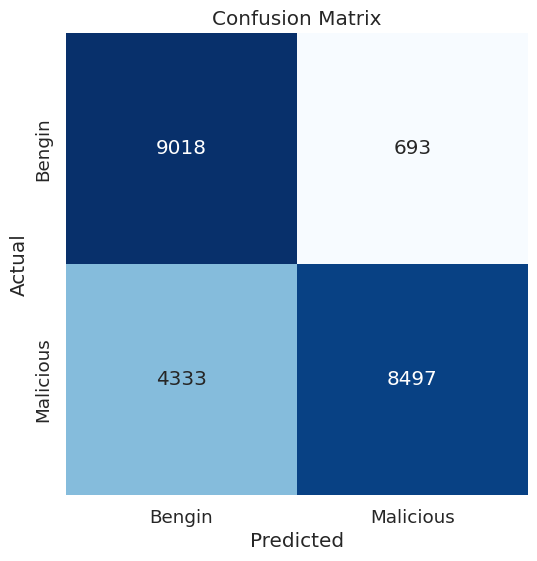

Current feature: service_gopher
70 features => accuracy: 0.7770285257974358
Previous accuracy: 0.7770285257974358
train dataset shape: (125964, 70)
Max accuracy: 0.7932656048977419
----------------------------------------------------------------------------------------------------
Using 1 features: Accuracy = 0.6611507918903332
Using 2 features: Accuracy = 0.6635020629075906
Using 3 features: Accuracy = 0.6923384055720687
Using 4 features: Accuracy = 0.7377667361696464
Using 5 features: Accuracy = 0.7544474513109445
Using 6 features: Accuracy = 0.7585732664921698
Using 7 features: Accuracy = 0.7473936382591722
Using 8 features: Accuracy = 0.7531609067920678
Using 9 features: Accuracy = 0.7513863626280999
Using 10 features: Accuracy = 0.745796548511601
Using 11 features: Accuracy = 0.7381660086065392
Using 12 features: Accuracy = 0.7378554633778448
Using 13 features: Accuracy = 0.7552903597888292
Using 14 features: Accuracy = 0.7164278425979327
Using 15 features: Accuracy = 0.6993922186

In [44]:
accuracy_results = []
accuracy_list = []
train_list = []

cnt = 70
prev_accuracy = None
max_accuracy = -1

while cnt > 0:

  current_feature = top_features.pop(0)
  train_list.append(current_feature)

  X_train_copy = X_train[train_list]
  X_test_copy = X_test[train_list]

  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=(len(train_list),)))
  model.add(Dropout(0.5))
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  model.fit(X_train_copy, y_train, epochs=10, batch_size=256, validation_data=(X_test_copy, y_test))
  y_pred = model.predict(X_test_copy)

  accuracy = evaluate_classification_with_plot(y_test, y_pred, class_names=['Bengin', 'Malicious'])

  max_accuracy = max(accuracy,max_accuracy)


  accuracy_results.append((len(train_list), accuracy))
  accuracy_list.append(accuracy)
  prev_accuracy = accuracy

  print(f"Current feature: {current_feature}")
  print(f"{len(train_list)} features => accuracy: {accuracy}")
  print(f"Previous accuracy: {prev_accuracy}")
  print(f"train dataset shape: {X_train_copy.shape}")
  cnt -= 1
  print(f"Max accuracy: {max_accuracy}")
  print("-" * 100)

for top_rank, accuracy in accuracy_results:
  print(f"Using {top_rank} features: Accuracy = {accuracy}")


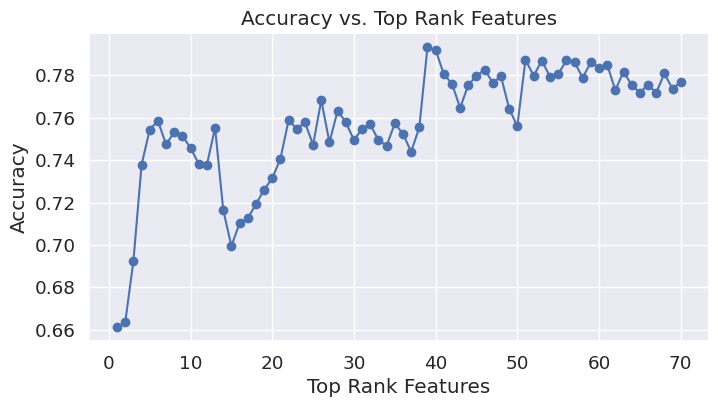

In [45]:
import matplotlib.pyplot as plt

top_rank_values = [top_rank for top_rank, accuracy in accuracy_results]
accuracy_values = [accuracy for top_rank, accuracy in accuracy_results]

plt.plot(top_rank_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Top Rank Features')
plt.xlabel('Top Rank Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [46]:
top_features = []
check_pass = 0
max_value = max(accuracy_list)
print(f"The maximum accuracy is: {max_value}")

for top_rank, accuracy in accuracy_results:
    if accuracy == max_value:
      print(f"{top_rank} features give the hightest accuracy")
      check_pass = 1
      top_features.append(train_list[top_rank-1])
      break
    if check_pass == 0:
      top_features.append(train_list[top_rank-1])

print(top_features)


The maximum accuracy is: 0.7932656048977419
39 features give the hightest accuracy
['count', 'dst_host_count', 'logged_in', 'flag_SF', 'service_http', 'same_srv_rate', 'dst_host_srv_count', 'srv_serror_rate', 'serror_rate', 'dst_host_serror_rate', 'flag_S0', 'dst_host_srv_serror_rate', 'srv_count', 'protocol_type_tcp', 'service_private', 'dst_host_same_src_port_rate', 'duration', 'srv_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_rerror_rate', 'protocol_type_udp', 'dst_host_same_srv_rate', 'srv_diff_host_rate', 'hot', 'flag_REJ', 'service_domain_u', 'diff_srv_rate', 'protocol_type_icmp', 'dst_host_diff_srv_rate', 'service_smtp', 'service_ftp_data', 'service_other', 'service_eco_i', 'service_telnet', 'dst_host_srv_diff_host_rate', 'service_ecr_i', 'wrong_fragment', 'flag_RSTR']


In [47]:
print(train_list)
print(len(train_list))

['count', 'dst_host_count', 'logged_in', 'flag_SF', 'service_http', 'same_srv_rate', 'dst_host_srv_count', 'srv_serror_rate', 'serror_rate', 'dst_host_serror_rate', 'flag_S0', 'dst_host_srv_serror_rate', 'srv_count', 'protocol_type_tcp', 'service_private', 'dst_host_same_src_port_rate', 'duration', 'srv_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_rerror_rate', 'protocol_type_udp', 'dst_host_same_srv_rate', 'srv_diff_host_rate', 'hot', 'flag_REJ', 'service_domain_u', 'diff_srv_rate', 'protocol_type_icmp', 'dst_host_diff_srv_rate', 'service_smtp', 'service_ftp_data', 'service_other', 'service_eco_i', 'service_telnet', 'dst_host_srv_diff_host_rate', 'service_ecr_i', 'wrong_fragment', 'flag_RSTR', 'service_ftp', 'flag_RSTO', 'service_finger', 'is_guest_login', 'service_pop_3', 'service_auth', 'service_imap4', 'service_Z39_50', 'service_uucp', 'service_courier', 'service_bgp', 'service_iso_tsap', 'service_uucp_path', 'num_file_creations', 'service_whois', 'src_bytes',